# Competition #2: Data Audit Report

## Research Question & Goal:
Is it possible to predict the sale price for each house in our data set? It is our job to predict the sales price for each house. For each Id in the test set, we must predict the value of the SalePrice variable. 

## Business Understanding:
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

A house is a building that functions as a home, ranging from simple dwellings such as rudimentary huts of nomadic tribes and the improvised shacks in shantytowns to complex, fixed structures of wood, brick, concrete or other materials containing plumbing, ventilation and electrical systems. Houses use a range of different roofing systems to keep precipitation such as rain from getting into the dwelling space. Houses may have doors or locks to secure the dwelling space and protect its inhabitants and contents from burglars or other trespassers. Most conventional modern houses in Western cultures will contain one or more bedrooms and bathrooms, a kitchen or cooking area, and a living room. A house may have a separate dining room, or the eating area may be integrated into another room. Some large houses in North America have a recreation room. 

Of all the different possible ways a house can be constructed, and with all the various materials that can be used in its construction, how can one accurately determine the price of a house? Often when we refer to price we refer to sale price of a house. Architecture, foundations, floor space, number of rooms all could play a part in determining the sale price of a house. The data set that has been gathered for the purposes of this report contains 81 variables - 1 ID variable, 1 Target variables (SalePrice) and 79 Predictor variables listed below.    
* MSSubClass: The building class
*     MSZoning: The general zoning classification
*     LotFrontage: Linear feet of street connected to property
*     LotArea: Lot size in square feet
*     Street: Type of road access
*     Alley: Type of alley access
*     LotShape: General shape of property
*     LandContour: Flatness of the property
*     Utilities: Type of utilities available
*     LotConfig: Lot configuration
*     LandSlope: Slope of property
*     Neighborhood: Physical locations within Ames city limits
*     Condition1: Proximity to main road or railroad
*     Condition2: Proximity to main road or railroad (if a second is present)
*     BldgType: Type of dwelling
*     HouseStyle: Style of dwelling
*     OverallQual: Overall material and finish quality
*     OverallCond: Overall condition rating
*     YearBuilt: Original construction date
*     YearRemodAdd: Remodel date
*     RoofStyle: Type of roof
*     RoofMatl: Roof material
*     Exterior1st: Exterior covering on house
*     Exterior2nd: Exterior covering on house (if more than one material)
*     MasVnrType: Masonry veneer type
*     MasVnrArea: Masonry veneer area in square feet
*     ExterQual: Exterior material quality
*     ExterCond: Present condition of the material on the exterior
*     Foundation: Type of foundation
*     BsmtQual: Height of the basement
*     BsmtCond: General condition of the basement
*     BsmtExposure: Walkout or garden level basement walls
*     BsmtFinType1: Quality of basement finished area
*     BsmtFinSF1: Type 1 finished square feet
*     BsmtFinType2: Quality of second finished area (if present)
*     BsmtFinSF2: Type 2 finished square feet
*     BsmtUnfSF: Unfinished square feet of basement area
*     TotalBsmtSF: Total square feet of basement area
*     Heating: Type of heating
*     HeatingQC: Heating quality and condition
*     CentralAir: Central air conditioning
*     Electrical: Electrical system
*     1stFlrSF: First Floor square feet
*     2ndFlrSF: Second floor square feet
*     LowQualFinSF: Low quality finished square feet (all floors)
*     GrLivArea: Above grade (ground) living area square feet
*     BsmtFullBath: Basement full bathrooms
*     BsmtHalfBath: Basement half bathrooms
*     FullBath: Full bathrooms above grade
*     HalfBath: Half baths above grade
*     Bedroom: Number of bedrooms above basement level
*     Kitchen: Number of kitchens
*     KitchenQual: Kitchen quality
*     TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
*     Functional: Home functionality rating
*     Fireplaces: Number of fireplaces
*     FireplaceQu: Fireplace quality
*     GarageType: Garage location
*     GarageYrBlt: Year garage was built
*     GarageFinish: Interior finish of the garage
*     GarageCars: Size of garage in car capacity
*     GarageArea: Size of garage in square feet
*     GarageQual: Garage quality
*     GarageCond: Garage condition
*     PavedDrive: Paved driveway
*     WoodDeckSF: Wood deck area in square feet
*     OpenPorchSF: Open porch area in square feet
*     EnclosedPorch: Enclosed porch area in square feet
*     3SsnPorch: Three season porch area in square feet
*     ScreenPorch: Screen porch area in square feet
*     PoolArea: Pool area in square feet
*     PoolQC: Pool quality
*     Fence: Fence quality
*     MiscFeature: Miscellaneous feature not covered in other categories
*     MiscVal: Value of miscellaneous feature
*     MoSold: Month Sold
*     YrSold: Year Sold
*     SaleType: Type of sale
*     SaleCondition: Condition of sale
   


# Data Understanding
## Training Set
Our data set is divided into two parts, a training set and a testing set. To begin with we examine the training set. The data set contains 81 columns and 1460 rows. Our variables have the following breakdown: 36 are quantitative, 43 categorical and then Id and SalePrice are viewed as separate as ID offers no predicitve value and SalePrice is the target variable.

In [1]:
# Importing useful packages
import numpy as np
from scipy import stats
import pandas as pd
import sklearn as sk
import seaborn as sb
import datetime as dt
import pylab 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.cross_validation import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics

from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import precision_recall_fscore_support


# Read in Data file and define NaN values
housetrain = pd.read_csv("train.csv",header=0,na_values='None')
housetrain.MSSubClass = housetrain.MSSubClass.astype(str)

C:\Users\conor\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\conor\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Reading in the data into our python workspace, we had to change one of our integer variables to be a string for ease as it was not a ordinal categorical variarble. We then print out our data types to make sure we are happy woth them.

In [2]:
# Print types
pd.set_option('display.max_rows', 82)
print(housetrain.dtypes)

Id                 int64
MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


Next we do a data describe to see summary statistics of our data. As we can see below some of our data has missing values. 

In [3]:
# Data describe
pd.set_option('display.max_columns', 500)
print(housetrain.describe())

                Id  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean    730.500000    70.049958   10516.828082     6.099315     5.575342   
std     421.610009    24.284752    9981.264932     1.382997     1.112799   
min       1.000000    21.000000    1300.000000     1.000000     1.000000   
25%     365.750000    59.000000    7553.500000     5.000000     5.000000   
50%     730.500000    69.000000    9478.500000     6.000000     5.000000   
75%    1095.250000    80.000000   11601.500000     7.000000     6.000000   
max    1460.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000

Summary statistics are important to observe obvious outliers and initial trends.
* Some of our variables contain missing data. This is by and large due to the formatting of the data in its use of "NA" to show when a house doesn't contain a feature. Nonetheless it was decided to use it as missing initially to investigate if any variables contained a imbalances due to missing data. Additionally, some variables contain all records (1460) but have zero as the minimum. Based on our analysis, this is more than likely due to the fact the house doesn't have this feature. For example, if we look at *TotBsmtSF*, which is the total square feet of the basement, we see that it is missing no records but has zero as a minimum. This more than likely means that the house does not have a basement.
* We notice on average, there is more unfinished basement space than finished basement space. 
* There is on average 200 square feet less space upstairs than downstairs in houses. This makes sense as some homes don't have a complete second floor, and most houses are not built as a perfect square but reduce size on the second floor for structural requirements. 
* Some of our summary statistic variables are actually ordinal data so their summary statistics do not reveal much other than that they have no erroneous values (*OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, GarageYrBlt, MoSold, YrSold*)

Next we look to quantify the missingness of our data.

In [4]:
# Get numeric value to missing features
for i in range(len(housetrain.columns)):
    j = housetrain.columns[i]
    miss=((1460-housetrain[str(j)].count())/1460)*100
    print("The missingness of variable {}".format(j))
    print("{0:.2f}%".format(miss))

The missingness of variable Id
0.00%
The missingness of variable MSSubClass
0.00%
The missingness of variable MSZoning
0.00%
The missingness of variable LotFrontage
17.74%
The missingness of variable LotArea
0.00%
The missingness of variable Street
0.00%
The missingness of variable Alley
93.77%
The missingness of variable LotShape
0.00%
The missingness of variable LandContour
0.00%
The missingness of variable Utilities
0.00%
The missingness of variable LotConfig
0.00%
The missingness of variable LandSlope
0.00%
The missingness of variable Neighborhood
0.00%
The missingness of variable Condition1
0.00%
The missingness of variable Condition2
0.00%
The missingness of variable BldgType
0.00%
The missingness of variable HouseStyle
0.00%
The missingness of variable OverallQual
0.00%
The missingness of variable OverallCond
0.00%
The missingness of variable YearBuilt
0.00%
The missingness of variable YearRemodAdd
0.00%
The missingness of variable RoofStyle
0.00%
The missingness of variable Roo

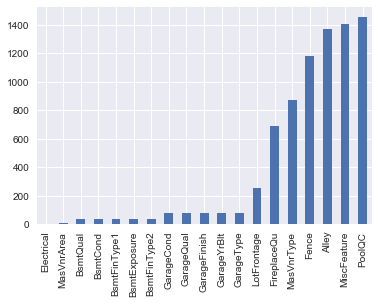

In [5]:
missing = housetrain.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

The most obvious example of missing is *PoolQC*. Looking at the graph it has the most number of missing values as most people probably do not have a pool in their house. Looking at the main culprits of missing values, we actaully see it makes sense that these variables contain so much missing. *MiscFeature* is for features like tennis courts, second garages, elevators and not many families can afford these types of add ons to their home. For the moment, it was decided to keep them as the few houses they do affect would see a dramatic increase in their sale price because of these features. Anything with around 50% of the data missing should be removed from further analysis, meaning we remove the following variables:
* *PoolQC*
* *MiscFeature*
* *Alley*
* *Fence*
* *MasVnrType*
* *FireplaceQu* 

However, despite the large number of missing values, these could be construed as rare noise so we will keep them for the moment. Later we will use Principal Component Analysis and let PCA decide which variables should be kept.

## Imputation
As we saw, the biggest culprits of our missing data have perfectly logical reasons behind it. With that in mind it was decided to fill in the NA values using either string representations of what was really going on (i.e. no pool) or zero.

In [6]:
# Alley : data description says NA means "no alley access"
housetrain.loc[:, "Alley"] = housetrain.loc[:, "Alley"].fillna("None")
# BedroomAbvGr : NA most likely means 0
housetrain.loc[:, "BedroomAbvGr"] = housetrain.loc[:, "BedroomAbvGr"].fillna(0)
# BsmtQual etc : data description says NA for basement features is "no basement"
housetrain.loc[:, "BsmtQual"] = housetrain.loc[:, "BsmtQual"].fillna("No")
housetrain.loc[:, "BsmtCond"] = housetrain.loc[:, "BsmtCond"].fillna("No")
housetrain.loc[:, "BsmtExposure"] = housetrain.loc[:, "BsmtExposure"].fillna("No")
housetrain.loc[:, "BsmtFinType1"] = housetrain.loc[:, "BsmtFinType1"].fillna("No")
housetrain.loc[:, "BsmtFinType2"] = housetrain.loc[:, "BsmtFinType2"].fillna("No")
housetrain.loc[:, "BsmtFullBath"] = housetrain.loc[:, "BsmtFullBath"].fillna(0)
housetrain.loc[:, "BsmtHalfBath"] = housetrain.loc[:, "BsmtHalfBath"].fillna(0)
housetrain.loc[:, "BsmtUnfSF"] = housetrain.loc[:, "BsmtUnfSF"].fillna(0)
# CentralAir : NA most likely means No
housetrain.loc[:, "CentralAir"] = housetrain.loc[:, "CentralAir"].fillna("N")
# Condition : NA most likely means Normal
housetrain.loc[:, "Condition1"] = housetrain.loc[:, "Condition1"].fillna("Norm")
housetrain.loc[:, "Condition2"] = housetrain.loc[:, "Condition2"].fillna("Norm")
# EnclosedPorch : NA most likely means no enclosed porch
housetrain.loc[:, "EnclosedPorch"] = housetrain.loc[:, "EnclosedPorch"].fillna(0)
# External stuff : NA most likely means average
housetrain.loc[:, "ExterCond"] = housetrain.loc[:, "ExterCond"].fillna("TA")
housetrain.loc[:, "ExterQual"] = housetrain.loc[:, "ExterQual"].fillna("TA")
# Fence : data description says NA means "no fence"
housetrain.loc[:, "Fence"] = housetrain.loc[:, "Fence"].fillna("No")
# FireplaceQu : data description says NA means "no fireplace"
housetrain.loc[:, "FireplaceQu"] = housetrain.loc[:, "FireplaceQu"].fillna("No")
housetrain.loc[:, "Fireplaces"] = housetrain.loc[:, "Fireplaces"].fillna(0)
# Functional : data description says NA means typical
housetrain.loc[:, "Functional"] = housetrain.loc[:, "Functional"].fillna("Typ")
# GarageType etc : data description says NA for garage features is "no garage"
housetrain.loc[:, "GarageType"] = housetrain.loc[:, "GarageType"].fillna("No")
housetrain.loc[:, "GarageFinish"] = housetrain.loc[:, "GarageFinish"].fillna("No")
housetrain.loc[:, "GarageQual"] = housetrain.loc[:, "GarageQual"].fillna("No")
housetrain.loc[:, "GarageCond"] = housetrain.loc[:, "GarageCond"].fillna("No")
housetrain.loc[:, "GarageArea"] = housetrain.loc[:, "GarageArea"].fillna(0)
housetrain.loc[:, "GarageCars"] = housetrain.loc[:, "GarageCars"].fillna(0)
# HalfBath : NA most likely means no half baths above grade
housetrain.loc[:, "HalfBath"] = housetrain.loc[:, "HalfBath"].fillna(0)
# HeatingQC : NA most likely means typical
housetrain.loc[:, "HeatingQC"] = housetrain.loc[:, "HeatingQC"].fillna("TA")
# KitchenAbvGr : NA most likely means 0
housetrain.loc[:, "KitchenAbvGr"] = housetrain.loc[:, "KitchenAbvGr"].fillna(0)
# KitchenQual : NA most likely means typical
housetrain.loc[:, "KitchenQual"] = housetrain.loc[:, "KitchenQual"].fillna("TA")
# LotFrontage : NA most likely means no lot frontage
housetrain.loc[:, "LotFrontage"] = housetrain.loc[:, "LotFrontage"].fillna(0)
# LotShape : NA most likely means regular
housetrain.loc[:, "LotShape"] = housetrain.loc[:, "LotShape"].fillna("Reg")
# MasVnrType : NA most likely means no veneer
#housetrain.loc[:, "MasVnrType"] = housetrain.loc[:, "MasVnrType"].fillna("None")
housetrain.loc[:, "MasVnrArea"] = housetrain.loc[:, "MasVnrArea"].fillna(0)
# MiscFeature : data description says NA means "no misc feature"
housetrain.loc[:, "MiscFeature"] = housetrain.loc[:, "MiscFeature"].fillna("No")
housetrain.loc[:, "MiscVal"] = housetrain.loc[:, "MiscVal"].fillna(0)
# OpenPorchSF : NA most likely means no open porch
housetrain.loc[:, "OpenPorchSF"] = housetrain.loc[:, "OpenPorchSF"].fillna(0)
# PavedDrive : NA most likely means not paved
housetrain.loc[:, "PavedDrive"] = housetrain.loc[:, "PavedDrive"].fillna("N")
# PoolQC : data description says NA means "no pool"
housetrain.loc[:, "PoolQC"] = housetrain.loc[:, "PoolQC"].fillna("No")
housetrain.loc[:, "PoolArea"] = housetrain.loc[:, "PoolArea"].fillna(0)
# SaleCondition : NA most likely means normal sale
housetrain.loc[:, "SaleCondition"] = housetrain.loc[:, "SaleCondition"].fillna("Normal")
# ScreenPorch : NA most likely means no screen porch
housetrain.loc[:, "ScreenPorch"] = housetrain.loc[:, "ScreenPorch"].fillna(0)
# TotRmsAbvGrd : NA most likely means 0
housetrain.loc[:, "TotRmsAbvGrd"] = housetrain.loc[:, "TotRmsAbvGrd"].fillna(0)
# Utilities : NA most likely means all public utilities
housetrain.loc[:, "Utilities"] = housetrain.loc[:, "Utilities"].fillna("AllPub")
# WoodDeckSF : NA most likely means no wood deck
housetrain.loc[:, "WoodDeckSF"] = housetrain.loc[:, "WoodDeckSF"].fillna(0)

## Outliers
Outliers are tricky when it comes to houses as bidding wars can drive up a price of a house, additionaly abstract features like tennis courts also greatly affect the selling price of a house, where the house is located can have serious implications as to the value of a house. Additionally with so many variables to maintain and manage, tracking down outliers is a difficult business. For simplicity, we will examine sale price against the above grade square feet as this variable tells us a very important feature of a house.

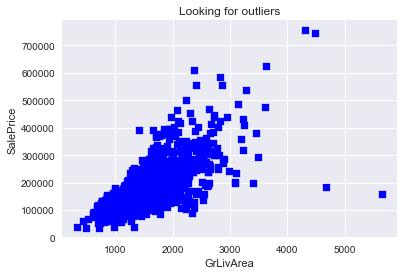

In [7]:
# Plotting scatter plot of the two variables
plt.scatter(housetrain.GrLivArea, housetrain.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

As we can see, we have four outliers. Two houses that sold for far less than they should have based on the square footage, and two that sold for far more than the average. It was decided, based discussions and advice from the project brief on Kaggle to remove house that have a square footage of more than 4000 feet. This is a removal of 4 data points.

In [8]:
housetrain = housetrain[housetrain.GrLivArea < 4000]

## Recoding
Recoding involves substituting the values of a variable with values that are more useful. Recoding is done for a number of reasons; to create a more balanced variable by grouping small occurances, to reduce the number of distinct values, to group similar values together and so on. It is an important feature in data analysis as it helps to reduce the curse of dimensionaility later when we create dummy variables for our categorical variables.

In this section, we will be conducting an initial recoding of our variables. This will be based on trying to keep a variable having no more than 5 distinct values. Groupings will be done using the methods listed above. The first task is to get the frequency counts of our current values in each variable as we will see below.

In [9]:
# Graphing missing data
group = housetrain.columns.to_series().groupby(housetrain.dtypes).groups # grouping columns by type
groups={k.name: v for k, v in group.items()} #  creating as dictionary

# Taking only the object type col names
objects=housetrain[groups['object'].values]
#print(objects.head(5))
# Printing freqiency counts
for i in objects.columns:
        #print('{} \n' .format(objects[i]))
        print(objects[i].value_counts())
        print('\n')

20     536
60     295
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


RL         1147
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


Pave    1450
Grvl       6
Name: Street, dtype: int64


None    1365
Grvl      50
Pave      41
Name: Alley, dtype: int64


Reg    925
IR1    481
IR2     41
IR3      9
Name: LotShape, dtype: int64


Lvl    1309
Bnk      61
HLS      50
Low      36
Name: LandContour, dtype: int64


AllPub    1455
NoSeWa       1
Name: Utilities, dtype: int64


Inside     1051
Corner      260
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


Gtl    1378
Mod      65
Sev      13
Name: LandSlope, dtype: int64


NAmes      225
CollgCr    150
OldTown    113
Edwards     98
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawf

As we can observe, there are over a dozen varaibles that have more than 5 distinct values. There will be a lot of work involved in completing this recoding. Below find the list of variables, how we rocoded and why. If a variable is not listed, it was deemed that no changes were necessary to the variable.

* MSSubClass: Complex - Requires Specilised case
*     MSZoning: Complex - Requires Specilised case
*     LotShape: Grouped the irregular options together to create more balanced variable
*     LandContour: Changed to binary in order to create a more balanced variable
*     LotConfig: Grouped Frontage together to create a more balanced variable
*     Neighborhood: Complex - Requires Specilised case
*     Condition1: Grouped railrowad and positive features to create a more balanced variable
*     Condition2: Grouped railrowad and positive features to create a more balanced variable
*     HouseStyle: Grouped 1 story and 1.5 story together, 2 story+ together to reduce number of distinct values
*     OverallQual: Recoded to reduce number of distinct values/add numerical order
*     OverallCond: Recoded to reduce number of distinct values/add numerical order
*     RoofStyle: Regrouped everything not Gable or Hip to other to create more balanced variable
*     RoofMatl: Made binary of standard vs not standard to reduce number of distinct values
*     Exterior1st: Complex - Requires Specilised case
*     Exterior2nd: Complex - Requires Specilised case
*     ExterQual: Recoded to reduce number of distinct values/add numerical order
*     ExterCond: Recoded to reduce number of distinct values/add numerical order
*     Foundation: Grouped non standard to other to reduce number of distinct variables
*     BsmtQual: Recoded to reduce number of distinct values/add numerical order
*     BsmtCond: Recoded to reduce number of distinct values/add numerical order
*     BsmtExposure: Recoded to reduce number of distinct values/add numerical orders
*     BsmtFinType1: Grouped like values together to reduce number of distinct values
*     BsmtFinType2: Grouped like values together to reduce number of distinct values
*     Heating: Grouped Gas together to reduce number of distinct values
*     HeatingQC: Recoded to reduce number of distinct values/add numerical order
*     KitchenQual: Recoded to reduce number of distinct values/add numerical order
*     Functional: Recoded to reduce number of distinct values/add numerical order
*     GarageType: Complex - Requires Specilised case
*     GarageQual: Recoded to reduce number of distinct values/add numerical order
*     GarageCond: Recoded to reduce number of distinct values/add numerical order
*     SaleType: Grouped similar contracts together to reduce number of distinct values
*     SaleCondition: Complex - Requires Specilised case

The next blocks of code execute the above descriptions. We replace all the "Excellent" and "Good" ratings with 3, "Average" with 2 and so on. We group frontage on either 2 side and frontage on 3 sides to just frontage for *LotConfig* and many other changes in order to make the data more manageable, reduce the curse of dimensionaility, and ultimately, create a better model. 

In [10]:
# reg or irreg
housetrain['LotShape']=housetrain['LotShape'].replace(['IR1','IR2','IR3'],'IRReg')
#print(housetrain['LotShape'].value_counts())

# flat or not flat
housetrain['LandContour']=housetrain['LandContour'].replace(['Bnk','HLS','Low'],'NotFlat')
#print(housetrain['LandContour'].value_counts())

# combined frontage
housetrain['LotConfig']=housetrain['LotConfig'].replace(['FR2','FR3'],'Frontage')
#print(housetrain['LotConfig'].value_counts())

# combined rail and pos
housetrain['Condition1']=housetrain['Condition1'].replace(['RRNn','RRAn','RRNe','RRAe'],'Rail')
housetrain['Condition1']=housetrain['Condition1'].replace(['PosN','PosA'],'Pos')
#print(housetrain['Condition1'].value_counts())

# combined rail and pos
housetrain['Condition2']=housetrain['Condition2'].replace(['RRNn','RRAn','RRNe','RRAe'],'Rail')
housetrain['Condition2']=housetrain['Condition2'].replace(['PosN','PosA'],'Pos')
#print(housetrain['Condition2'].value_counts())

# Recoding to have less options and grouping similar
housetrain['ExterQual']=housetrain['ExterQual'].replace(['Ex','Gd'],'Above Average')
housetrain['ExterQual']=housetrain['ExterQual'].replace(['Fa','Po'],'Below Average')
#print(housetrain['ExterQual'].value_counts())

# Recoding to have less options and grouping similar
housetrain['ExterCond']=housetrain['ExterCond'].replace(['Ex','Gd'],'Above Average')
housetrain['ExterCond']=housetrain['ExterCond'].replace(['Fa','Po'],'Below Average')
#print(housetrain['ExterCond'].value_counts())

housetrain['HouseStyle']=housetrain['HouseStyle'].replace(['1Story','1.5Unf','1.5Fin'],'1to2Story')
housetrain['HouseStyle']=housetrain['HouseStyle'].replace(['2Story','2.5Unf','2.5Fin'],'2+Story')
#print(housetrain['HouseStyle'].value_counts())

housetrain['RoofStyle']=housetrain['RoofStyle'].replace(['Flat','Gambrel','Mansard','Shed'],'Other')
#print(housetrain['RoofStyle'].value_counts())

housetrain['RoofMatl']=housetrain['RoofMatl'].replace(['ClyTile','Membran','Metal','Roll','Tar&Grv','WdShake','WdShngl'],'Other')
#print(housetrain['RoofMatl'].value_counts())

# Recoding to have less options and grouping similar
housetrain['SaleType']=housetrain['SaleType'].replace(['WD','CWD','VWD'],'Warrenty Deed')
housetrain['SaleType']=housetrain['SaleType'].replace(['Con','ConLw','ConLI','ConLD'],'Contract')
#print(housetrain['SaleType'].value_counts())

# Recoding to have less options and grouping similar
housetrain['GarageCond']=housetrain['GarageCond'].replace(['Ex','Gd'],'Above Average')
housetrain['GarageCond']=housetrain['GarageCond'].replace(['Fa','Po'],'Below Average')
#print(housetrain['GarageCond'].value_counts())

# Recoding to have less options and grouping similar
housetrain['GarageQual']=housetrain['GarageQual'].replace(['Ex','Gd'],'Above Average')
housetrain['GarageQual']=housetrain['GarageQual'].replace(['Fa','Po'],'Below Average')
#print(housetrain['GarageQual'].value_counts())

# Recoding to have less options and grouping similar
housetrain['Functional']=housetrain['Functional'].replace(['Min1','Min2'],'Min')
housetrain['Functional']=housetrain['Functional'].replace(['Maj1','Maj2','Sev','Sal'],'Maj')
#print(housetrain['Functional'].value_counts())

# Recoding to have less options and grouping similar
housetrain['KitchenQual']=housetrain['KitchenQual'].replace(['Ex','Gd'],'Above Average')
housetrain['KitchenQual']=housetrain['KitchenQual'].replace(['Fa','Po'],'Below Average')
#print(housetrain['KitchenQual'].value_counts())

# Recoding to have less options and grouping similar
housetrain['HeatingQC']=housetrain['HeatingQC'].replace(['Ex','Gd'],'Above Average')
housetrain['HeatingQC']=housetrain['HeatingQC'].replace(['Fa','Po'],'Below Average')
#print(housetrain['HeatingQC'].value_counts())

# Merging Gas
housetrain['Heating']=housetrain['Heating'].replace(['GasA','GasW'],'Gas')
#print(housetrain['Heating'].value_counts())

# Recoding to have less options and grouping similar
housetrain['BsmtFinType2']=housetrain['BsmtFinType2'].replace(['ALQ','Rec'],'Average')
housetrain['BsmtFinType2']=housetrain['BsmtFinType2'].replace(['BLQ','LwQ'],'Below Average')
#print(housetrain['BsmtFinType2'].value_counts())

# Recoding to have less options and grouping similar
housetrain['BsmtFinType1']=housetrain['BsmtFinType1'].replace(['ALQ','Rec'],'Average')
housetrain['BsmtFinType1']=housetrain['BsmtFinType1'].replace(['BLQ','LwQ'],'Below Average')
#print(housetrain['BsmtFinType1'].value_counts())

# Recoding to have less options and grouping similar
housetrain['BsmtCond']=housetrain['BsmtCond'].replace(['Ex','Gd'],'Above Average')
housetrain['BsmtCond']=housetrain['BsmtCond'].replace(['Fa','Po'],'Below Average')
#print(housetrain['BsmtCond'].value_counts())

# Recoding to have less options and grouping similar
housetrain['BsmtQual']=housetrain['BsmtQual'].replace(['Ex','Gd'],'Above Average')
housetrain['BsmtQual']=housetrain['BsmtQual'].replace(['Fa','Po'],'Below Average')
#print(housetrain['BsmtQual'].value_counts())

# Foundation: One of the more standard options or other
housetrain['Foundation']=housetrain['Foundation'].replace(['BrkTil','Slab','Stone','Wood'],'Other')
#print(housetrain['Foundation'].value_counts())
group = housetrain.columns.to_series().groupby(housetrain.dtypes).groups # grouping columns by type
groups={k.name: v for k, v in group.items()} #  creating as dictionary

# Taking only the object type col names
objects=housetrain[groups['object'].values]
for i in objects.columns:
        #print('{} \n' .format(objects[i]))
        print(objects[i].value_counts())
        print('\n')

20     536
60     295
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


RL         1147
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


Pave    1450
Grvl       6
Name: Street, dtype: int64


None    1365
Grvl      50
Pave      41
Name: Alley, dtype: int64


Reg      925
IRReg    531
Name: LotShape, dtype: int64


Lvl        1309
NotFlat     147
Name: LandContour, dtype: int64


AllPub    1455
NoSeWa       1
Name: Utilities, dtype: int64


Inside      1051
Corner       260
CulDSac       94
Frontage      51
Name: LotConfig, dtype: int64


Gtl    1378
Mod      65
Sev      13
Name: LandSlope, dtype: int64


NAmes      225
CollgCr    150
OldTown    113
Edwards     98
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     39
Timber

In [11]:
# Encode some categorical features as ordered numbers when there is information in the order
housetrain = housetrain.replace({"BsmtCond" : {"No" : 0, "Below Average" : 1, "TA" : 2, "Above Average":3},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                        "Fence":{"GdPrv":2,"GdWo":2,"MnPrv":1,"MnWw":1,"No":0},
                        "LotShape":{"IRReg":0,"Reg":1},
                        "CentralAir":{"N":0,"Y":1},
                        "LandContour":{"NotFlat":0,"Lvl":1},
                        "PavedDrive":{"N":0,"Y":1,"P":1},
                       "BsmtQual" : {"No" : 0, "Below Average" : 1, "TA" : 2, "Above Average":3},
                       "ExterCond" : {"Below Average" : 1, "TA" : 2, "Above Average":3},
                       "ExterQual" : {"Below Average" : 1, "TA" : 2, "Above Average":3},
                       "BsmtFinType1":{"No":0,"Unf":1,"Below Average":1,"Average":2,"GLQ":3},
                        "BsmtFinType2":{"No":0,"Unf":1,"Below Average":1,"Average":2,"GLQ":3},
                       "Functional" : {"Maj" : 1, "Mod" : 2, "Min" : 3, "Typ" : 4},
                       "GarageCond" : {"No" : 0, "Below Average" : 1, "TA" : 2, "Above Average":3},
                       "GarageQual" : {"No" : 0, "Below Average" : 1, "TA" : 2, "Above Average":3},
                       "HeatingQC" : {"Below Average" : 1, "TA" : 2, "Above Average":3},
                       "KitchenQual" : {"Below Average" : 1, "TA" : 2, "Above Average":3},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3}}
                     )

# Create new features
# 1* Simplifications of existing features
housetrain["OverallQual"] = housetrain.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
housetrain["OverallCond"] = housetrain.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })



group = housetrain.columns.to_series().groupby(housetrain.dtypes).groups # grouping columns by type
groups={k.name: v for k, v in group.items()} #  creating as dictionary

# Taking only the object type col names
objects=housetrain[groups['object'].values]
for i in objects.columns:
        #print('{} \n' .format(objects[i]))
        print(objects[i].value_counts())
        print('\n')

20     536
60     295
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


RL         1147
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


Pave    1450
Grvl       6
Name: Street, dtype: int64


None    1365
Grvl      50
Pave      41
Name: Alley, dtype: int64


AllPub    1455
NoSeWa       1
Name: Utilities, dtype: int64


Inside      1051
Corner       260
CulDSac       94
Frontage      51
Name: LotConfig, dtype: int64


NAmes      225
CollgCr    150
OldTown    113
Edwards     98
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     39
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [12]:
int64=housetrain[groups['int64'].values]
for i in int64.columns:
        #print('{} \n' .format(objects[i]))
        print(int64[i].value_counts())
        print('\n')

1460    1
478     1
480     1
481     1
482     1
483     1
484     1
485     1
486     1
487     1
488     1
489     1
490     1
491     1
492     1
493     1
494     1
495     1
496     1
497     1
498     1
479     1
477     1
500     1
476     1
457     1
458     1
459     1
460     1
461     1
462     1
463     1
464     1
465     1
466     1
467     1
468     1
469     1
470     1
471     1
472     1
       ..
984     1
985     1
986     1
987     1
988     1
989     1
990     1
991     1
992     1
993     1
994     1
995     1
996     1
997     1
998     1
999     1
1000    1
1001    1
982     1
981     1
980     1
969     1
961     1
962     1
963     1
964     1
965     1
966     1
967     1
968     1
970     1
979     1
971     1
972     1
973     1
974     1
975     1
976     1
977     1
978     1
1       1
Name: Id, Length: 1456, dtype: int64


7200     25
9600     24
6000     17
9000     14
8400     14
10800    14
1680     10
7500      9
9100      8
8125      8
6120      8

Name: BsmtHalfBath, dtype: int64


2    767
1    650
3     30
0      9
Name: FullBath, dtype: int64


0    913
1    531
2     12
Name: HalfBath, dtype: int64


3    802
2    358
4    211
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64


1    1388
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64


2    735
3    682
1     39
Name: KitchenQual, dtype: int64


6     402
7     329
5     275
8     187
4      97
9      75
10     45
11     17
3      17
12     10
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64


4    1356
3      65
1      20
2      15
Name: Functional, dtype: int64


0    690
1    649
2    113
3      4
Name: Fireplaces, dtype: int64


2    823
1    369
3    178
0     81
4      5
Name: GarageCars, dtype: int64


0       81
440     49
576     47
240     38
484     34
528     33
288     27
400     25
264     24
480     24
308     20
420     19
280     16
672     15
504     12
216     12
352     12
336     12
360     11
564     11
54

In [13]:
# Combining variables
housetrain['BsmtFinSF']=housetrain['BsmtFinSF1']+housetrain['BsmtFinSF2']
housetrain['PorchSF']=housetrain['OpenPorchSF']+housetrain['EnclosedPorch']+housetrain['3SsnPorch']+housetrain['ScreenPorch']

housetrain['hasPool'] = np.where(housetrain['PoolArea']>0, 1, 0)

In [14]:
print(housetrain['hasPool'])

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
       ..
1419    0
1420    0
1421    0
1422    0
1423    1
1424    0
1425    0
1426    0
1427    0
1428    0
1429    0
1430    0
1431    0
1432    0
1433    0
1434    0
1435    0
1436    0
1437    0
1438    0
1439    0
1440    0
1441    0
1442    0
1443    0
1444    0
1445    0
1446    0
1447    0
1448    0
1449    0
1450    0
1451    0
1452    0
1453    0
1454    0
1455    0
1456    0
1457    0
1458    0
1459    0
Name: hasPool, Length: 1456, dtype: int32


## Normalising
Most statistical methods (the parametric methods) include the assumption that the sample is drawn from a population where the values have a Normal distribution. One of the first steps of statistical analysis of your data is therefore to check the distribution of the different variables.

Upon completing the task of dealing with missing values and errors in the data, it was decided to move on to normalizing our data.

The Normal distribution is symmetrical, not very peaked or very flat-topped, and if we exam the charts below we can see that our data is often skewed.

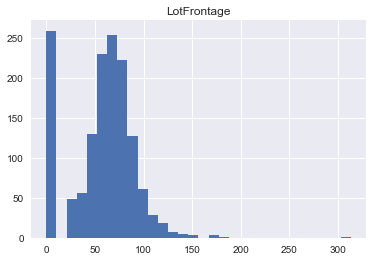

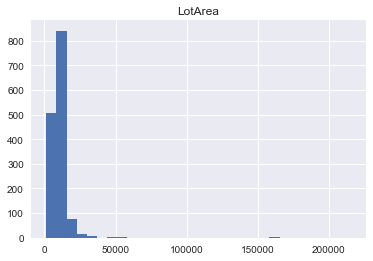

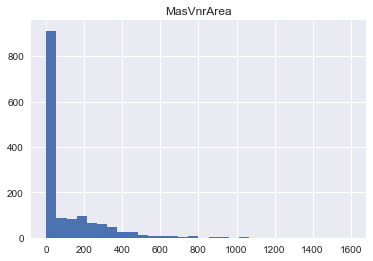

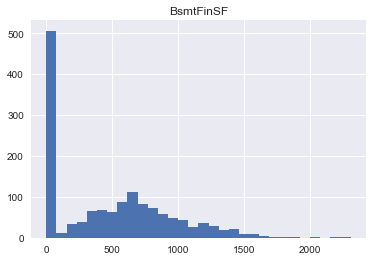

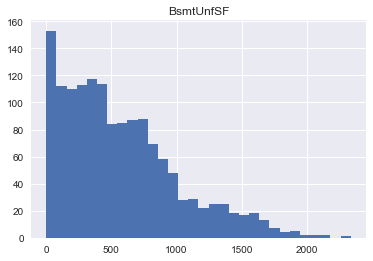

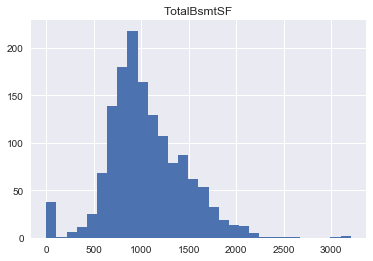

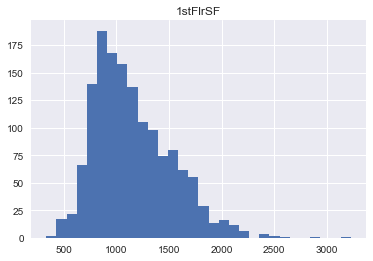

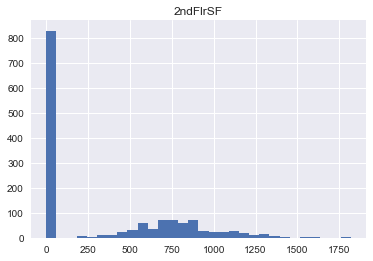

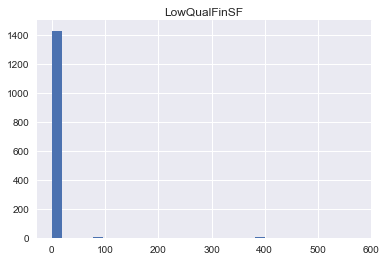

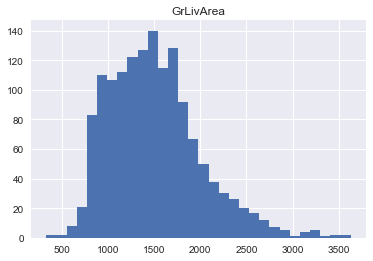

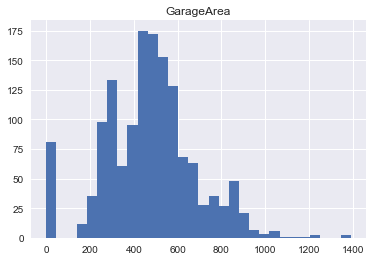

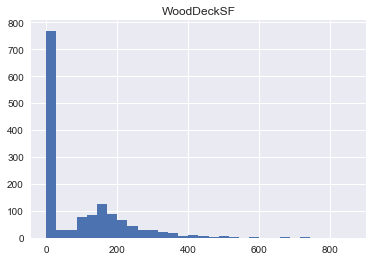

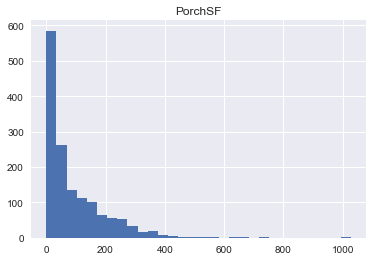

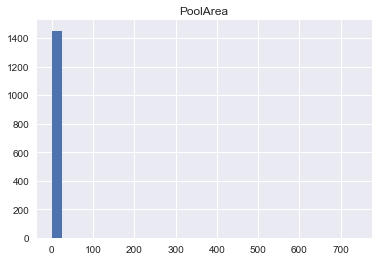

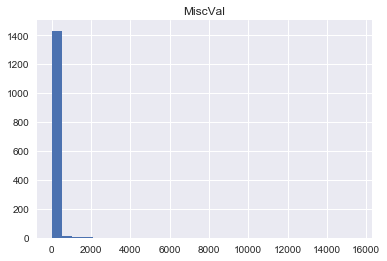

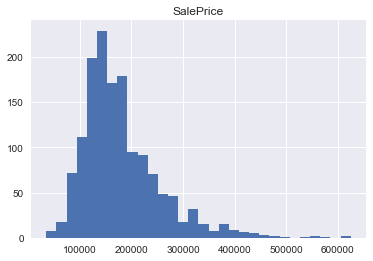

In [15]:
# Printing plots for int 64 and float64
# #quantvar = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
#             'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd',
#             'Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea'
#            ,'MiscVal','SalePrice']
quantvar = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
            'LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','PorchSF','PoolArea'
           ,'MiscVal','SalePrice']
cont_plot=housetrain[quantvar]
for i in range(len(cont_plot.columns)):
        plt.hist(cont_plot.iloc[:,i].dropna(),bins=30)
        plt.title('%s' % cont_plot.columns[i])
        plt.show()

Examining the charts we can note several points of interest. We have several variables that skewed to the right. There do not appear to be any left skewed. This is more than likely caused by the presence of smaller outliers that were missed by our earlier scatter plot. 

For dealing with skew, the following transformations perform well:

* The log transformation (sometimes computed log(x+A) where A is some constant. This is done to deal with negative or 0 values.
* The Square Root function
* Converting to a Fraction, i.e. 1/x
* The Powers transformation

We can also use some combination thereof. For our base model, it was decided to keep things simple initially, and as we try to improve our models, try alternate methods.

For right skewed data, the log transformation works well, and this was the selected transformation for our model for the severly right skewed data listed above. It is suspected that if the outliers were dealt with, the data would become more normally distributed. This was the decided approach with a view of returning to this as we seek to improve the model.


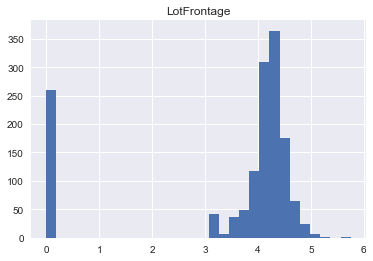

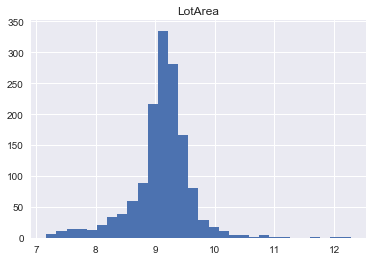

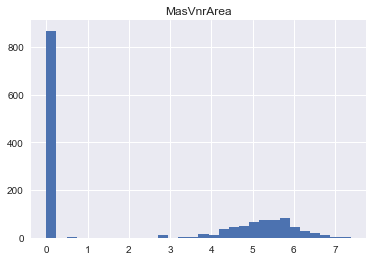

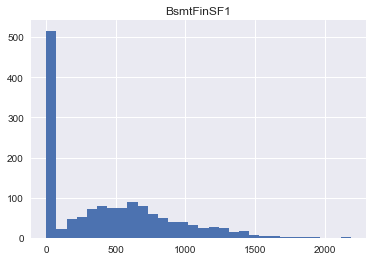

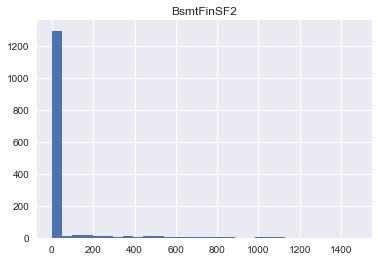

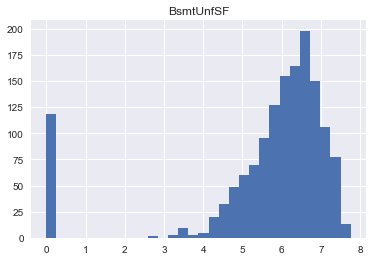

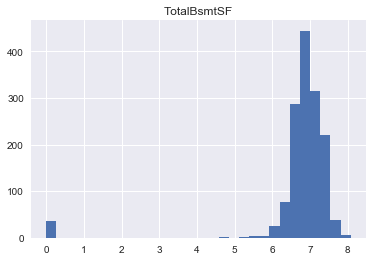

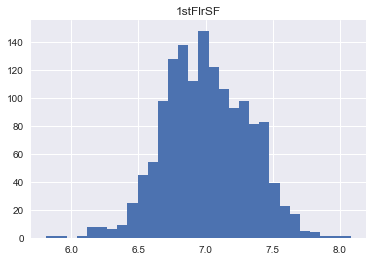

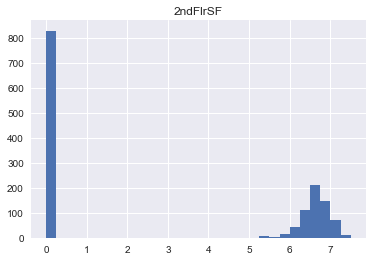

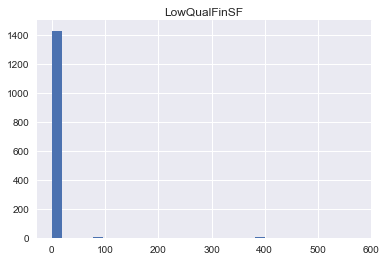

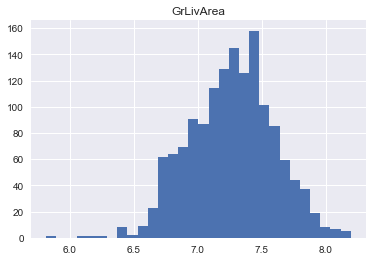

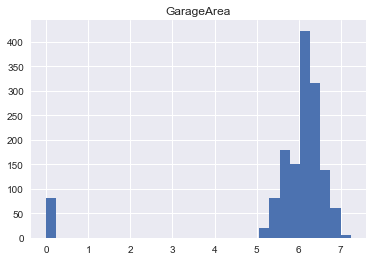

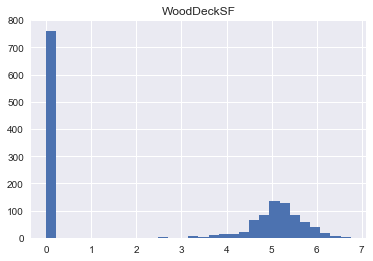

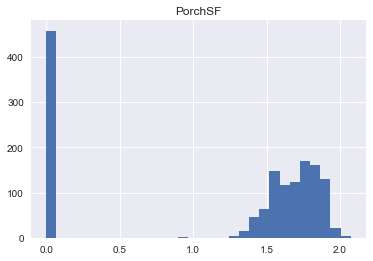

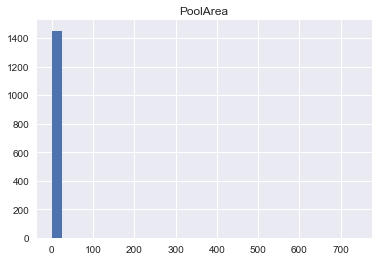

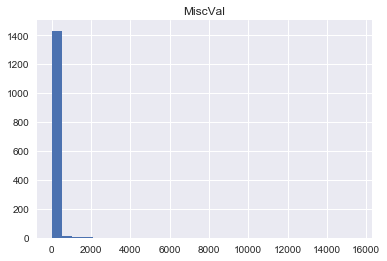

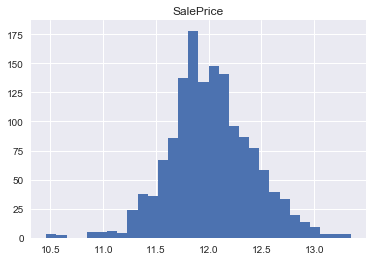

In [16]:
def log_transform(feature):
    housetrain[feature] = np.log1p(housetrain[feature].values) # does a log transform on x+1

#log transforming variables
log_transform('GrLivArea')
log_transform('PorchSF')
log_transform('1stFlrSF')
log_transform('2ndFlrSF')
log_transform('BsmtUnfSF')
log_transform('BsmtFinSF')
log_transform('TotalBsmtSF')
log_transform('LotArea')
log_transform('LotFrontage')
log_transform('KitchenAbvGr')
log_transform('GarageArea')
log_transform('MasVnrArea')
log_transform('WoodDeckSF')
log_transform('PorchSF')
log_transform('SalePrice')
quantvar = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
            'LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','PorchSF','PoolArea'
           ,'MiscVal','SalePrice']
cont_plot=housetrain[quantvar]
for i in range(len(cont_plot.columns)):
        plt.hist(cont_plot.iloc[:,i].dropna(),bins=30)
        plt.title('%s' % cont_plot.columns[i])
        plt.show()
# f = pd.melt(housetrain, value_vars=quantitative)
# g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
# g = g.map(sns.distplot, "value")

As we can see, using a log transformation we have normalised our data (excluding the zero values representing missing) and have tidied up the outliers.

# Standardising

In [17]:
import scipy.stats as st
def standard(data,method):
    """Standarising data using various methods.
    
    Method 1 is MinMax scaling 
    Method 2 is decimal
    Method 3 is Z score
    Version Control:
    Initial coding
    ------------------------------------------
    Date 4-Feb-18, Author: Conor Feeney, Desc: Initial Coding
    """
    if method == 1:
        X_std = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))
        data = X_std * (1 - 0) + 0
        return data
    elif method==2:
        data = (data)/(10**len(str(int(max(data)))))
        return data
    elif method ==3:
        data = (data - data.mean(axis=0))/data.std(axis=0)
        data=st.norm.cdf(data)
        return data
    elif method==4:
        return data
    
for i in range(len(housetrain.columns)):     
    if housetrain.iloc[:,i].dtype !=object:   
        housetrain.iloc[:,i]=standard(housetrain.iloc[:,i],3)
housetrain.describe()

C:\Users\conor\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\conor\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\conor\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1735: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


,Id,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SalePrice,BsmtFinSF,PorchSF,hasPool
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1.456000e+03,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1.456000e+03,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1.456000e+03,1456.000000,1456.000000,1.456000e+03,1456.000000,1375.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,0.499960,0.556345,0.513281,0.526844,0.567605,5.578268e-01,0.482983,0.460007,0.518062,0.520313,0.477213,0.478646,0.456787,0.521750,0.526206,0.455235,0.489104,0.478420,0.469908,0.443175,0.551491,5.447160e-01,0.537109,0.564738,0.498201,0.485697,0.461625,0.502850,0.480552,0.438352,0.503801,0.473656,0.500511,4.441888e-01,0.502421,0.485132,5.546457e-01,0.485117,0.518936,0.511587,0.557376,0.556878,0.559110,0.564092,0.492805,0.458969,0.439575,0.462476,0.440185,0.478633,0.441874,0.479069,0.492264,0.497156,0.495400,0.529651,0.533082,0.478400
std,0.310983,0.260035,0.246158,0.328427,0.189798,1.326918e-01,0.319705,0.262970,0.299295,0.315327,0.327929,0.322924,0.190805,0.289349,0.159514,0.288466,0.316728,0.298836,0.151120,0.166231,0.225258,1.443651e-01,0.299699,0.149235,0.292820,0.337118,0.070863,0.291009,0.327376,0.136357,0.322966,0.323893,0.270128,1.226013e-01,0.324160,0.280062,1.467451e-01,0.305913,0.300537,0.279794,0.165566,0.175709,0.169227,0.144829,0.337430,0.254838,0.201797,0.068552,0.159725,0.030616,0.241340,0.075488,0.289086,0.310906,0.281604,0.320190,0.316280,0.030629
min,0.041945,0.017423,0.000081,0.093519,0.001427,1.235911e-12,0.004140,0.003510,0.000512,0.045899,0.210363,0.003260,0.000725,0.000137,0.000002,0.264761,0.022157,0.154897,0.000952,0.386297,0.001174,1.900013e-09,0.001398,0.000077,0.000071,0.192940,0.452096,0.000005,0.206395,0.405268,0.002174,0.224070,0.000223,8.433203e-16,0.004264,0.002589,4.065905e-11,0.170714,0.000745,0.009027,0.000033,0.000099,0.000072,0.000049,0.172672,0.239702,0.359514,0.453644,0.393383,0.476836,0.324696,0.465026,0.024198,0.085810,0.000040,0.078124,0.072544,0.476603
25%,0.193242,0.573835,0.363158,0.093519,0.631186,5.893853e-01,0.243885,0.337575,0.284670,0.190856,0.210363,0.236404,0.404209,0.259843,0.536399,0.264761,0.188109,0.154897,0.448768,0.386297,0.449205,4.765690e-01,0.122288,0.604152,0.238777,0.192940,0.452096,0.235610,0.206395,0.405268,0.152493,0.224070,0.144586,4.176796e-01,0.210182,0.175030,5.944753e-01,0.170714,0.240007,0.152823,0.498728,0.605859,0.606313,0.601254,0.172672,0.239702,0.359514,0.453644,0.393383,0.476836,0.324696,0.465026,0.311537,0.269344,0.266090,0.078124,0.072544,0.476603
50%,0.500504,0.666017,0.537402,0.775596,0.631186,5.893853e-01,0.243885,0.337575,0.510758,0.662831,0.210363,0.236404,0.404209,0.803348,0.536399,0.264761,0.595351,0.448230,0.448768,0.386297,0.611214,5.529220e-01,0.746034,0.604152,0.481546,0.192940,0.452096,0.525093,0.206395,0.405268,0.788166,0.224070,0.565863,4.176796e-01,0.210182,0.376743,5.944753e-01,0.729161,0.525187,0.623883,0.599635,0.605859,0.606313,0.601254,0.172672,0.366921,0.359514,0.453644,0.393383,0.476836,0.324696,0.465026,0.451884,0.554653,0.47942

## Correlation Analysis

Next, we needed to select the predictor variables with low pair-wise correlation values. In order to do this, we used Spearman's correlation test to determine the statistical dependence between the rankings of pairs of variables.

#### Spearman Test

The Spearman's rank-order correlation is the nonparametric version of the Pearson product-moment correlation. Spearman's correlation coefficient, measures the strength and direction of association between two ranked variables. This test has some assumptions. You need two variables that are either ordinal, interval or ratio. Although you would normally hope to use a Pearson product-moment correlation on interval or ratio data, the Spearman correlation can be used when the assumptions of the Pearson correlation are markedly violated. However, Spearman's correlation determines the strength and direction of the monotonic relationship between your two variables rather than the strength and direction of the linear relationship between your two variables, which is what Pearson's correlation determines. A monotonic relationship is a relationship that does one of the following: (1) as the value of one variable increases, so does the value of the other variable; or (2) as the value of one variable increases, the other variable value decreases.

Below, you can observe the results of our Spearman correlation test.

In [18]:
corr=['LotFrontage','LotArea','LotShape',"BsmtFinType1","BsmtFinType2",'LandSlope','ExterQual','ExterCond','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','HeatingQC','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','GarageQual','GarageCond','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SalePrice']

housetrain[corr].corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

Looking at the above results, we see some expected correlations:
* **SalePrice** is correlated with YearBuilt, OverallQual, BsmtQual,TotalBsmtSF, GrLivArea, FullBath, KitchenQual, GarageCars, GarageArea
* **BsmtFinType1** and **BsmtFinType2** are correlated with BsmtFinSF1 and BsmtFinSF2 respectively
* **ExterQual** is correlated with OverallQual, YearBuilt, YearRemodAdd, BsmtQual, KitchenQual, GarageYrBlt and SalePrice 
* **OverallQual** is correlated with YearBuilt, ExterQual and KitchenQual
* **YearBlt** is correlated with GarageCars, GarageYrBlt, BsmntQual, YearRemodAdd, SalePrice
* **YearRemodAdd** is correlated with YearBuilt, KitchenQual, GarageYrBlt, SalePrice
* **BsmtQual** is correlated with YearBuilt, GarageYrBlt
* **SalePrice** variable is correlated with YearBuilt OverallQual and GRLivArea
* **GarageYrBlt** variable is correlated with YearBuilt, YearRemodAdd, and BsmtQual, and GarageCars
* **1stFlrSF** variable is correlated with TotalBsmtSF
* **TotRmsAbvGrd** variable is correlated with GrLivArea and BedroomAbvGrd
* **GarageArea** variable is correlated with GarageCars
* **GarageCond** variable is correlated with GarageQual
* **BsmtFinSF1** is correlated with BsmtFullBath
* **TotalBsmtSF** is correlated with 1stFlrSF, SalePrice
* **2ndFlrSF** is correlated with GrLivArea, and HalfBath
* **BsmtFullBath** is correlated with BsmtFinSF1
* **FullBath** is correlated with GrLivArea and SalePrice
* **BedroomAbvGr** is correlated with TotalRmsAbvGrd
* **KitchenQual** is correlated with YearRemodAdd, OverallQual, and SalePrice
* **GarageCars** is correlated with YrBuilt, GarageYrBlt, GarageArea, and Sale Price
* **GarageArea** is correlated with Sale Price, Garage Cars

#### ANOVA

Next, for Categorical vs Continuous variables, we used the analysis of variance (ANOVA). ANOVA provides a statistical test of whether or not the means of several groups are equal.

To keep our ANOVA correlations simple, we chose to only analyze our target variable, SalesPrice, against each categorical variable. Below, you can observe the results of our ANOVA correlation tests.

In [19]:
for i in (['SalePrice']):
    grps = pd.unique(housetrain.Condition1.values)
    d_data = {grp:housetrain[i][housetrain.Condition1 == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['Norm'], d_data['Feedr'], d_data['Artery'], d_data['Rail'], d_data['Pos'])
    print('Condition1 v Variable {} Result {}'.format(i,anova))

Condition1 v Variable SalePrice Result F_onewayResult(statistic=17.553926520035429, pvalue=4.4457161059550624e-14)


In [20]:
for i in (['SalePrice']):
    grps = pd.unique(housetrain.Condition2.values)
    d_data = {grp:housetrain[i][housetrain.Condition2 == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['Norm'], d_data['Feedr'], d_data['Artery'], d_data['Rail'], d_data['Pos'])
    print('Condition2 v Variable {} Result {}'.format(i,anova))

Condition2 v Variable SalePrice Result F_onewayResult(statistic=4.0371811668233164, pvalue=0.0029259071303826801)


In [21]:
for i in (['SalePrice']):
    grps = pd.unique(housetrain.Foundation.values)
    d_data = {grp:housetrain[i][housetrain.Foundation == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['PConc'], d_data['CBlock'], d_data['Other'])
    print('Foundation v Variable {} Result {}'.format(i,anova))

Foundation v Variable SalePrice Result F_onewayResult(statistic=352.99904433933301, pvalue=1.1264280358270717e-125)


In [22]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.Heating.values)
    d_data = {grp:housetrain[i][housetrain.Heating == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['Gas'],d_data['Grav'],d_data['Wall'],d_data['OthW'],d_data['Floor'])
    print('Heating v Variable {} Result {}'.format(i,anova))

Heating v Variable SalePrice Result F_onewayResult(statistic=7.9881940556220661, pvalue=2.2792104552219803e-06)


In [23]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.HouseStyle.values)
    d_data = {grp:housetrain[i][housetrain.HouseStyle == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['1to2Story'],d_data['2+Story'],d_data['SLvl'],d_data['SFoyer'])
    print('HouseStyle v Variable {} Result {}'.format(i,anova))

HouseStyle v Variable SalePrice Result F_onewayResult(statistic=44.728621189377243, pvalue=1.2042751040081352e-27)


In [24]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.LotConfig.values)
    d_data = {grp:housetrain[i][housetrain.LotConfig == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['Inside'],d_data['Corner'],d_data['CulDSac'],d_data['Frontage'])
    print('LotConfig v Variable {} Result {}'.format(i,anova))

LotConfig v Variable SalePrice Result F_onewayResult(statistic=11.725262866714207, pvalue=1.3635166072715538e-07)


In [25]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.RoofMatl.values)
    d_data = {grp:housetrain[i][housetrain.RoofMatl == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['CompShg'],d_data['Other'])
    print('RoofMatl v Variable {} Result {}'.format(i,anova))

RoofMatl v Variable SalePrice Result F_onewayResult(statistic=9.1792867351649434, pvalue=0.0024908688525218737)


In [26]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.RoofStyle.values)
    d_data = {grp:housetrain[i][housetrain.RoofStyle == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['Gable'],d_data['Hip'],d_data['Other'])
    print('RoofStyle v Variable {} Result {}'.format(i,anova))

RoofStyle v Variable SalePrice Result F_onewayResult(statistic=19.348951143684129, pvalue=5.0910832062187951e-09)


In [27]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.SaleType.values)
    d_data = {grp:housetrain[i][housetrain.SaleType == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['Warrenty Deed'],d_data['New'],d_data['COD'],d_data['Contract'],d_data['Oth'])
    print('SaleType v Variable {} Result {}'.format(i,anova))

SaleType v Variable SalePrice Result F_onewayResult(statistic=44.017640252645272, pvalue=6.528123230893233e-35)


In [28]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.MSZoning.values)
    d_data = {grp:housetrain[i][housetrain.MSZoning == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['RL'],d_data['RM'],d_data['FV'],d_data['RH'],d_data['C (all)'])
    print('MSZoning v Variable {} Result {}'.format(i,anova))

MSZoning v Variable SalePrice Result F_onewayResult(statistic=78.918253594278056, pvalue=1.2415337633012105e-60)


In [29]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.Street.values)
    d_data = {grp:housetrain[i][housetrain.Street == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['Pave'],d_data['Grvl'])
    print('Street v Variable {} Result {}'.format(i,anova))

Street v Variable SalePrice Result F_onewayResult(statistic=2.9744617288552457, pvalue=0.08480078079618926)


In [30]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.Alley.values)
    d_data = {grp:housetrain[i][housetrain.Alley == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['None'],d_data['Grvl'],d_data['Pave'])
    print('Alley v Variable {} Result {}'.format(i,anova))

Alley v Variable SalePrice Result F_onewayResult(statistic=22.367575442858147, pvalue=2.7066052766030589e-10)


In [31]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.Utilities.values)
    d_data = {grp:housetrain[i][housetrain.Utilities == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['NoSeWa'],d_data['AllPub'])
    print('Utilities v Variable {} Result {}'.format(i,anova))

Utilities v Variable SalePrice Result F_onewayResult(statistic=0.40953160873447858, pvalue=0.52230815934730224)


In [32]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.Electrical.values)
    d_data = {grp:housetrain[i][housetrain.Electrical == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['SBrkr'],d_data['FuseA'],d_data['FuseF'],d_data['FuseP'],d_data['Mix'])
    print('Electrical v Variable {} Result {}'.format(i,anova))

Electrical v Variable SalePrice Result F_onewayResult(statistic=35.306011007320102, pvalue=3.5628571007823335e-28)


In [33]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.BldgType.values)
    d_data = {grp:housetrain[i][housetrain.BldgType == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['1Fam'],d_data['TwnhsE'],d_data['Duplex'],d_data['Twnhs'],d_data['2fmCon'])
    print('BldgType v Variable {} Result {}'.format(i,anova))

BldgType v Variable SalePrice Result F_onewayResult(statistic=18.203774908534502, pvalue=1.3323566234678146e-14)


In [34]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.MasVnrType.values)
    d_data = {grp:housetrain[i][housetrain.MasVnrType == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['BrkFace'],d_data['Stone'],d_data['BrkCmn'])
    print('MasVnrType v Variable {} Result {}'.format(i,anova))

MasVnrType v Variable SalePrice Result F_onewayResult(statistic=35.967136674498157, pvalue=1.8713951553943954e-15)


In [35]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.FireplaceQu.values)
    d_data = {grp:housetrain[i][housetrain.FireplaceQu == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['Gd'],d_data['TA'],d_data['Fa'],d_data['Ex'],d_data['Po'])
    print('FireplaceQu v Variable {} Result {}'.format(i,anova))

FireplaceQu v Variable SalePrice Result F_onewayResult(statistic=21.533072284020118, pvalue=7.5869862969595068e-17)


In [36]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.GarageType.values)
    d_data = {grp:housetrain[i][housetrain.GarageType == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['Attchd'],d_data['Detchd'],d_data['BuiltIn'],d_data['No'],d_data['Basment'],d_data['CarPort'],d_data['2Types'])
    print('GarageType v Variable {} Result {}'.format(i,anova))

GarageType v Variable SalePrice Result F_onewayResult(statistic=133.13725438493162, pvalue=2.3265607495409275e-134)


In [37]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.GarageFinish.values)
    d_data = {grp:housetrain[i][housetrain.GarageFinish == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['Unf'],d_data['RFn'],d_data['Fin'],d_data['No'])
    print('GarageFinish v Variable {} Result {}'.format(i,anova))

GarageFinish v Variable SalePrice Result F_onewayResult(statistic=334.78768417279059, pvalue=3.3476916956481242e-165)


In [38]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.PoolQC.values)
    d_data = {grp:housetrain[i][housetrain.PoolQC == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['Fa'],d_data['Gd'],d_data['Ex'])
    print('PoolQC v Variable {} Result {}'.format(i,anova))

PoolQC v Variable SalePrice Result F_onewayResult(statistic=0.068531718844535225, pvalue=0.9358636551111067)


In [39]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.MiscFeature.values)
    d_data = {grp:housetrain[i][housetrain.MiscFeature == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['Shed'],d_data['Gar2'],d_data['Othr'],d_data['TenC'])
    print('MiscFeature v Variable {} Result {}'.format(i,anova))

MiscFeature v Variable SalePrice Result F_onewayResult(statistic=1.906895927396892, pvalue=0.14046501633657071)


In [40]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.SaleCondition.values)
    d_data = {grp:housetrain[i][housetrain.SaleCondition == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['Normal'],d_data['Partial'],d_data['Abnorml'],d_data['Family'],d_data['Alloca'],d_data['AdjLand'])
    print('SaleCondition v Variable {} Result {}'.format(i,anova))

SaleCondition v Variable SalePrice Result F_onewayResult(statistic=40.05685360857678, pvalue=1.1542656937812057e-38)


In [41]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.SaleCondition.values)
    d_data = {grp:housetrain[i][housetrain.SaleCondition == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['Normal'],d_data['Partial'],d_data['Abnorml'],d_data['Family'],d_data['Alloca'],d_data['AdjLand'])
    print('SaleCondition v Variable {} Result {}'.format(i,anova))

SaleCondition v Variable SalePrice Result F_onewayResult(statistic=40.05685360857678, pvalue=1.1542656937812057e-38)


Our ANOVA analysis resulted in the following correlations:
* **SalePrice** is correlated with Utilities and PoolQC

# Base Model
Multiple linear regression attempts to model the relationship between two or more explanatory variables and a response variable by fitting a linear equation to observed data. Every value of the independent variable x is associated with a value of the dependent variable y. In linear regression, the relationships are modeled using linear predictor functions whose unknown model parameters are estimated from the data. Such models are called linear models.Most commonly, the conditional mean of y given the value of X is assumed to be an affine function of X, where X is our predictor variables. Like all forms of regression analysis, linear regression focuses on the conditional probability distribution of y given X, rather than on the joint probability distribution of y and X, which is the domain of multivariate analysis.

Linear regression was the first type of regression analysis to be studied rigorously, and to be used extensively in practical applications. This is because models which depend linearly on their unknown parameters are easier to fit than models which are non-linearly related to their parameters and because the statistical properties of the resulting estimators are easier to determine. Linear regression models are often fitted using the least squares approach, but they may also be fitted in other ways, such as by minimizing the "lack of fit" in some other norm (as with least absolute deviations regression), or by minimizing a penalized version of the least squares cost function as in ridge regression (L2-norm penalty) and lasso (L1-norm penalty). We will be looking at some of these alternate versions in further advanced models.

## Assumptions
* Weak exogeneity
* Constant variance
* Linearity
* Lack of perfect multicollinearity
* Independence of errors

Below, we begin to build our model. An important thing to note is the dimensionaility can cause serious problems with MLR, meaning we will also need to incorporate some feature selection techniques in order to reduce the number of predictor variables. This should help reduce the possibility of overfitting also.



In [42]:
# Importing packages for linear regression
from sklearn.feature_selection import RFE
from sklearn import linear_model

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE

# creating a copy of the data set
testtrain=pd.DataFrame.copy(housetrain)
testtrain=testtrain.drop('Utilities',axis=1)
testtrain=testtrain.drop('PoolQC',axis=1)
testtrain=testtrain.drop('PoolArea',axis=1)
# creating dummy variables for categorical variables
group = testtrain.columns.to_series().groupby(testtrain.dtypes).groups # grouping columns by type
groups={k.name: v for k, v in group.items()} #  creating as dictionary

dummies = pd.get_dummies(testtrain[groups['object'].values])
testrain = testtrain.join(dummies)

# dropping ID so its not included in the analysis
testrain=testrain.drop('Id',axis=1)

# Pulling our target variable into its own dataframe
y=pd.DataFrame.copy(testrain['SalePrice'])

# Dropping variables that had been recoded
testrain=testrain.drop('SalePrice',axis=1)
testrain=testrain.drop(testrain[groups['object'].values],axis=1)
testrain=testrain.drop('GarageYrBlt',axis=1)
testrain=testrain.drop('OpenPorchSF',axis=1)
testrain=testrain.drop('EnclosedPorch',axis=1)
testrain=testrain.drop('3SsnPorch',axis=1)
testrain=testrain.drop('ScreenPorch',axis=1)
testrain=testrain.drop('BsmtFinSF1',axis=1)
testrain=testrain.drop('BsmtFinSF2',axis=1)

#Variables not present in testing set so wont explain any variance

testrain=testrain.drop('Condition2_Rail',axis=1)
testrain=testrain.drop('Exterior1st_ImStucc',axis=1)
testrain=testrain.drop('Exterior1st_Stone',axis=1)
testrain=testrain.drop('Exterior2nd_Other',axis=1)
testrain=testrain.drop('Heating_Floor',axis=1)
testrain=testrain.drop('Heating_OthW',axis=1)
testrain=testrain.drop('Electrical_Mix',axis=1)
testrain=testrain.drop('MiscFeature_TenC',axis=1)



The reader may have noticed that we have removed additionally columns from our data set. These dummy variables were removed because they do not exist in the test data set seen later so they will provide no explained variance in the test set, hence we drop them so they can not be included in the model. The variables in question are highlighted in the code above using comments.

In [43]:
# imporing packages
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# creating linear regression object  
regr = linear_model.LinearRegression()

X=pd.DataFrame.copy(testrain)
# splitting the data into testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)   
# Train the model using the training sets

# fitting our model to the data
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ -9.42298406e-03   9.96993677e-02   1.69433583e-03   8.99482408e-03
  -1.20498070e-02   8.51748279e-02   8.56681633e-02   1.41314556e-01
   3.56686511e-02  -3.18309801e-02   5.32834958e-03  -2.41776837e-02
  -8.54243504e-03   2.66428626e-02   2.31579556e-02   1.75565347e-02
  -1.58329341e-02  -3.73492268e-02   1.67769779e-01   1.94546037e-02
   4.16476387e-02   5.90258930e-02  -1.13754941e-02  -5.78033659e-02
   2.95245211e-01   2.41340965e-02   1.77246168e-02   5.62109238e-02
   3.58543254e-02  -6.61329215e-03  -1.23721978e-01   2.32313457e-02
   8.78671119e-03   1.09325907e-01   7.57999712e-02   6.58414093e-02
   5.56488423e-02   2.46129830e-02   4.08508390e-02  -1.61000522e-02
   1.77182529e-02  -1.27657170e-02   4.58328882e-01   7.39087505e-03
   4.12260040e-04   3.91367456e-02   1.36039533e-02   2.88660413e-01
  -1.86944802e+09  -1.86944802e+09  -1.86944802e+09  -1.86944802e+09
  -1.86944802e+09  -1.86944802e+09  -1.86944802e+09  -1.86944802e+09
  -1.86944802e+09 

As we can see, the model shows over 90% accuracy, but overfitting will clearly be an issue due to the 200+ variables used. When dealing with dimensionailty issues, it is important to incorporate feature selection. There are several options for feature selection. In this next section we will examine Recursive Feature Selection. Recursive feature elimination is based on the idea to repeatedly construct a model (for example a regression model) and choose either the best or worst performing feature (for example based on coefficients), setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. Features are then ranked according to when they were eliminated. As such, it is a greedy optimization for finding the best performing subset of features.

The stability of RFE depends heavily on the type of model that is used for feature ranking at each iteration. Some benefits of feature selection are:
* Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
* Improves Accuracy: Less misleading data means modeling accuracy improves.
* Reduces Training Time: Less data means that algorithms train faster.


In [44]:
from sklearn.feature_selection import RFE
# load data

# arbitrarily decide to keep 85 variables
rfe = RFE(regr, 85)
rfe.fit(testrain, y)
#print("Num Features: %d") % fit.n_features_
# print("Selected Features: {}".format(fit.n_features_))
# print("Selected Features: {}".format(fit.support_))
# print("Selected Features: {}".format(fit.ranking_))


X_train, X_test, y_train, y_test = train_test_split(testrain, y, test_size=0.3)   

# Make predictions using the testing set
y_pred = rfe.predict(X_test)

# The coefficients

# The mean squared error
print("Mean squared error: %.5f"
      % np.sqrt(mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.5f' % r2_score(y_test, y_pred))

Mean squared error: 0.13400
Variance score: 0.76608


We now have a RMSE  of 0.15, and an R squared value of around 70%. The R squared value tells us the amount of variance our model explains. Using feature selection has substantianally reduced the error while simultaneously increasing the varaince our model explains. As this is our base model, the number of variables to keep was arbitrarily choosen. Later we will use a loop to try and find a more optimol solution.

An important thing to note here is that the model failed to include any continious variables in the model. In our opinion, this is a failing of the model that will need to be addressed because variables like square footage and overall quality definitely impact the selling price of a house. In order to prove this we decided to build a model using only numeric and ordinal data.

In [45]:
quantvar = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
            'LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','PorchSF'
           ,'MiscVal']
intvar = ['BsmtCond','BsmtExposure','Fence','LotShape','CentralAir','LandContour','PavedDrive','BsmtQual','ExterCond',
          'ExterQual','BsmtFinType1','BsmtFinType2','Functional','GarageCond','GarageQual','HeatingQC','KitchenQual','LandSlope'
         ,'OverallQual','OverallCond']

rfe = RFE(regr, 25)
rfe.fit(testrain[quantvar+intvar], y)
#print("Num Features: %d") % fit.n_features_
# print("Selected Features: {}".format(fit.n_features_))
# print("Selected Features: {}".format(fit.support_))
# print("Selected Features: {}".format(fit.ranking_))


X_train, X_test, y_train, y_test = train_test_split(testrain[quantvar+intvar], y, test_size=0.4, random_state=0)   

# Make predictions using the testing set
y_pred = rfe.predict(X_test)

# The coefficients

# The mean squared error
print("Mean squared error: %.5f"
      % np.sqrt(mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.5f' % r2_score(y_test, y_pred))

Mean squared error: 0.09255
Variance score: 0.89450


As we can see, we actually get better results than when we select 25 out of the 35 numeric variables. This shows us that we will need both categorical and continuous variables in our model as individually they are both strong so together they should augment each other. We have a RMSE of 0.09, and an R squared value of nearly 90%. This is better than the feature selection linear regression model we saw earlier.

It was decided to take a new approach in our model building. In order to improve our results we build a Lasso Regression model. Lasso stands for least absolute shrinkage and selection operator. This method performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces. Regularization is a process of introducing additional information in order to solve an ill-posed problem or to prevent overfitting. The goal of this learning problem is to find a function that fits or predicts the outcome that minimizes the expected error over all possible inputs. Lasso was originally formulated for least squares models and this simple case reveals a substantial amount about the behavior of the estimator, including its relationship to ridge regression and best subset selection and the connections between lasso coefficient estimates and so-called soft thresholding. It also reveals that (like standard linear regression) the coefficient estimates need not be unique if covariates are collinear.

In [46]:
X=pd.DataFrame.copy(testrain)

# creating list of choices for alpha
clf = linear_model.LassoCV(alphas=[0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1]) 
# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)  

# fitting data
clf.fit(X_train, y_train)

#Highlighting the best alpha
alpha = clf.alpha_
print("Best alpha :", alpha)

Best alpha : 0.0003


The alpha here refers to the constant that multiplies the L1 term. The L1 term is used in the regularisation, meaning it will influence the model significantly if not calculated correctly. Therefore having an appropriate alpha is important. Fortunately, in python the lasso regression package will pick the most optimol one from a provided list, as seen above. 

clf picked 98 features and eliminated the other 100 features


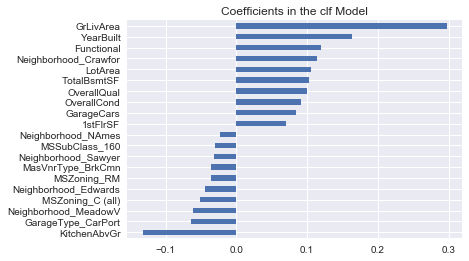

In [47]:
# Predicting
y_train_las = clf.predict(X_train)
y_test_las = clf.predict(X_test)
coefs = pd.Series(clf.coef_, index = X_train.columns)
print("clf picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the clf Model")
plt.show()

Above we can see how many features were selected for our model. The graph then shows us the top ten postive coefficients and bottom ten negative coefficients. The first thing we noticed is that the lasso model picks a both numeric and categorical data. Below we see the results of the model.

In [48]:
from sklearn.linear_model import LassoCV
var=r2_score(y_test, y_test_las)

rmse=np.sqrt(mean_squared_error(y_test, y_test_las))

kfold = model_selection.KFold(n_splits=10)
modelCV = LassoCV()
scoring = 'neg_mean_absolute_error'


results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)

print('Var {}, RMSE {}'.format(var,rmse))
print(results)

Var 0.9109132001162046, RMSE 0.08593072125355719
[-0.06598915 -0.05199884 -0.05570216 -0.05420357 -0.05957493 -0.05429686
 -0.06726741 -0.06449357 -0.05417588 -0.05858088]


This is our best model so far. We have over 90% of our variance explained and also have the lowest RMSE which is around 0.08. Additionally we used a k fold cross validation in order to test for overfitting. We are looking for extreme value differences in the results. As we can see, all the values in our array are reasonably close together showing no obvious signs of overfitting.

# Test Data Set
## Data Understanding
We have looked at and preprocessed the data for the training set (above). Next we look at the test data set. The first thing we do is read in the data and get some summary statistics.

The test set contains 80 variables and 1459 rows of data. The missing varaible is the target variable SalePrice. All other variables are the same

In [49]:
# Reading in our test data set
housetest = pd.read_csv("test.csv",header=0,na_values='None')
housetest.MSSubClass = housetest.MSSubClass.astype(str)
# Data describe

print(housetest.describe())

                Id  LotFrontage       LotArea  OverallQual  OverallCond  \
count  1459.000000  1232.000000   1459.000000  1459.000000  1459.000000   
mean   2190.000000    68.580357   9819.161069     6.078821     5.553804   
std     421.321334    22.376841   4955.517327     1.436812     1.113740   
min    1461.000000    21.000000   1470.000000     1.000000     1.000000   
25%    1825.500000    58.000000   7391.000000     5.000000     5.000000   
50%    2190.000000    67.000000   9399.000000     6.000000     5.000000   
75%    2554.500000    80.000000  11517.500000     7.000000     6.000000   
max    2919.000000   200.000000  56600.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1459.000000   1459.000000  1444.000000  1458.000000  1458.000000   
mean   1971.357779   1983.662783   100.709141   439.203704    52.619342   
std      30.390071     21.130467   177.625900   455.268042   176.753926   
min    1879.000000   195

* Some of our variables contain missing data. This is by and large due to the formatting of the data in its use of "NA" to show when a house doesn't contain a feature. Nonetheless it was decided to use it as missing initially to investigate if any variables contained a imbalances due to missing data. Additionally, some variables contain all records (1460) but have zero as the minimum. Based on our analysis, this is more than likely due to the fact the house doesn't have this feature. For example, if we look at TotBsmtSF, which is the total square feet of the basement, we see that it is missing no records but has zero as a minimum. This more than likely means that the house does not have a basement.
* We notice on average, there is more unfinished basement space than finished basement space. This is similar to the training set
* There is on average substantionally less square feet space upstairs than downstairs in houses. This makes sense as some homes don't have a complete second floor, and most houses are not built as a perfect square but reduce size on the second floor for structural requirements. However the size of this difference could be explained if there was more one and one and a half story homes in the testing set.
* Some of our summary statistic variables are actually ordinal data so their summary statistics do not reveal much other than that they have no erroneous values (OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, GarageYrBlt, MoSold, YrSold)

In this next section we will examine the missingness of our test data.

In [50]:
# Get numeric value to missing features
for i in range(len(housetest.columns)):
    j = housetest.columns[i]
    miss=((1459-housetest[str(j)].count())/1459)*100
    print("The missingness of variable {}".format(j))
    print("{0:.2f}%".format(miss))

The missingness of variable Id
0.00%
The missingness of variable MSSubClass
0.00%
The missingness of variable MSZoning
0.27%
The missingness of variable LotFrontage
15.56%
The missingness of variable LotArea
0.00%
The missingness of variable Street
0.00%
The missingness of variable Alley
92.67%
The missingness of variable LotShape
0.00%
The missingness of variable LandContour
0.00%
The missingness of variable Utilities
0.14%
The missingness of variable LotConfig
0.00%
The missingness of variable LandSlope
0.00%
The missingness of variable Neighborhood
0.00%
The missingness of variable Condition1
0.00%
The missingness of variable Condition2
0.00%
The missingness of variable BldgType
0.00%
The missingness of variable HouseStyle
0.00%
The missingness of variable OverallQual
0.00%
The missingness of variable OverallCond
0.00%
The missingness of variable YearBuilt
0.00%
The missingness of variable YearRemodAdd
0.00%
The missingness of variable RoofStyle
0.00%
The missingness of variable Roo

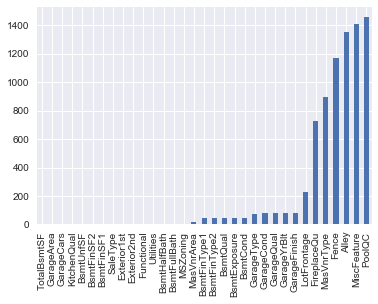

In [51]:
missing = housetest.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

The first thing we notice is that we have a more variables with missing data in our test set than our training set. It is important to note though, that all the variables with significant amounts of missing data are the same, and nearly to the exact same level, as our training set.

## Imputation
Just like our training set, we impue our missing data.

In [52]:
# Alley : data description says NA means "no alley access"
housetest.loc[:, "Alley"] = housetest.loc[:, "Alley"].fillna("None")
# BedroomAbvGr : NA most likely means 0
housetest.loc[:, "BedroomAbvGr"] = housetest.loc[:, "BedroomAbvGr"].fillna(0)
# BsmtQual etc : data description says NA for basement features is "no basement"
housetest.loc[:, "BsmtQual"] = housetest.loc[:, "BsmtQual"].fillna("No")
housetest.loc[:, "BsmtCond"] = housetest.loc[:, "BsmtCond"].fillna("No")
housetest.loc[:, "BsmtExposure"] = housetest.loc[:, "BsmtExposure"].fillna("No")
housetest.loc[:, "BsmtFinType1"] = housetest.loc[:, "BsmtFinType1"].fillna("No")
housetest.loc[:, "BsmtFinType2"] = housetest.loc[:, "BsmtFinType2"].fillna("No")
housetest.loc[:, "BsmtFullBath"] = housetest.loc[:, "BsmtFullBath"].fillna(0)
housetest.loc[:, "BsmtHalfBath"] = housetest.loc[:, "BsmtHalfBath"].fillna(0)
housetest.loc[:, "BsmtUnfSF"] = housetest.loc[:, "BsmtUnfSF"].fillna(0)
# CentralAir : NA most likely means No
housetest.loc[:, "CentralAir"] = housetest.loc[:, "CentralAir"].fillna("N")
# Condition : NA most likely means Normal
housetest.loc[:, "Condition1"] = housetest.loc[:, "Condition1"].fillna("Norm")
housetest.loc[:, "Condition2"] = housetest.loc[:, "Condition2"].fillna("Norm")
# EnclosedPorch : NA most likely means no enclosed porch
housetest.loc[:, "EnclosedPorch"] = housetest.loc[:, "EnclosedPorch"].fillna(0)
# External stuff : NA most likely means average
housetest.loc[:, "ExterCond"] = housetest.loc[:, "ExterCond"].fillna("TA")
housetest.loc[:, "ExterQual"] = housetest.loc[:, "ExterQual"].fillna("TA")
# Fence : data description says NA means "no fence"
housetest.loc[:, "Fence"] = housetest.loc[:, "Fence"].fillna("No")
# FireplaceQu : data description says NA means "no fireplace"
housetest.loc[:, "FireplaceQu"] = housetest.loc[:, "FireplaceQu"].fillna("No")
housetest.loc[:, "Fireplaces"] = housetest.loc[:, "Fireplaces"].fillna(0)
# Functional : data description says NA means typical
housetest.loc[:, "Functional"] = housetest.loc[:, "Functional"].fillna("Typ")
# GarageType etc : data description says NA for garage features is "no garage"
housetest.loc[:, "GarageType"] = housetest.loc[:, "GarageType"].fillna("No")
housetest.loc[:, "GarageFinish"] = housetest.loc[:, "GarageFinish"].fillna("No")
housetest.loc[:, "GarageQual"] = housetest.loc[:, "GarageQual"].fillna("No")
housetest.loc[:, "GarageCond"] = housetest.loc[:, "GarageCond"].fillna("No")
housetest.loc[:, "GarageArea"] = housetest.loc[:, "GarageArea"].fillna(0)
housetest.loc[:, "GarageCars"] = housetest.loc[:, "GarageCars"].fillna(0)
# HalfBath : NA most likely means no half baths above grade
housetest.loc[:, "HalfBath"] = housetest.loc[:, "HalfBath"].fillna(0)
# HeatingQC : NA most likely means typical
housetest.loc[:, "HeatingQC"] = housetest.loc[:, "HeatingQC"].fillna("TA")
# KitchenAbvGr : NA most likely means 0
housetest.loc[:, "KitchenAbvGr"] = housetest.loc[:, "KitchenAbvGr"].fillna(0)
# KitchenQual : NA most likely means typical
housetest.loc[:, "KitchenQual"] = housetest.loc[:, "KitchenQual"].fillna("TA")
# LotFrontage : NA most likely means no lot frontage
housetest.loc[:, "LotFrontage"] = housetest.loc[:, "LotFrontage"].fillna(0)
# LotShape : NA most likely means regular
housetest.loc[:, "LotShape"] = housetest.loc[:, "LotShape"].fillna("Reg")
# MasVnrType : NA most likely means no veneer
#housetest.loc[:, "MasVnrType"] = housetest.loc[:, "MasVnrType"].fillna("None")
housetest.loc[:, "MasVnrArea"] = housetest.loc[:, "MasVnrArea"].fillna(0)
# MiscFeature : data description says NA means "no misc feature"
housetest.loc[:, "MiscFeature"] = housetest.loc[:, "MiscFeature"].fillna("No")
housetest.loc[:, "MiscVal"] = housetest.loc[:, "MiscVal"].fillna(0)
# OpenPorchSF : NA most likely means no open porch
housetest.loc[:, "OpenPorchSF"] = housetest.loc[:, "OpenPorchSF"].fillna(0)
# PavedDrive : NA most likely means not paved
housetest.loc[:, "PavedDrive"] = housetest.loc[:, "PavedDrive"].fillna("N")
# PoolQC : data description says NA means "no pool"
housetest.loc[:, "PoolQC"] = housetest.loc[:, "PoolQC"].fillna("No")
housetest.loc[:, "PoolArea"] = housetest.loc[:, "PoolArea"].fillna(0)
# SaleCondition : NA most likely means normal sale
housetest.loc[:, "SaleCondition"] = housetest.loc[:, "SaleCondition"].fillna("Normal")
# ScreenPorch : NA most likely means no screen porch
housetest.loc[:, "ScreenPorch"] = housetest.loc[:, "ScreenPorch"].fillna(0)
# TotRmsAbvGrd : NA most likely means 0
housetest.loc[:, "TotRmsAbvGrd"] = housetest.loc[:, "TotRmsAbvGrd"].fillna(0)
# Utilities : NA most likely means all public utilities
housetest.loc[:, "Utilities"] = housetest.loc[:, "Utilities"].fillna("AllPub")
# WoodDeckSF : NA most likely means no wood deck
housetest.loc[:, "WoodDeckSF"] = housetest.loc[:, "WoodDeckSF"].fillna(0)
# Bsmt Square foot: missing probably means no basement
housetest.loc[:, "BsmtFinSF1"] = housetest.loc[:, "BsmtFinSF1"].fillna(0)
housetest.loc[:, "BsmtFinSF2"] = housetest.loc[:, "BsmtFinSF2"].fillna(0)
housetest.loc[:, "TotalBsmtSF"] = housetest.loc[:, "TotalBsmtSF"].fillna(0)

## Recoding
We also need to carry out recoding here. We need to ensure that the test set doe not contain any extra values not seen in the training or is missing any values not seen in the training.


In [53]:
# Graphing missing data
group = housetest.columns.to_series().groupby(housetest.dtypes).groups # grouping columns by type
groups={k.name: v for k, v in group.items()} #  creating as dictionary

# Taking only the object type col names
objects=housetest[groups['object'].values]
#print(objects.head(5))
# Printing freqiency counts
for i in objects.columns:
        #print('{} \n' .format(objects[i]))
        print(objects[i].value_counts())
        print('\n')

20     543
60     276
50     143
120     95
30      70
70      68
160     65
80      60
90      57
190     31
85      28
180      7
75       7
45       6
40       2
150      1
Name: MSSubClass, dtype: int64


RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64


Pave    1453
Grvl       6
Name: Street, dtype: int64


None    1352
Grvl      70
Pave      37
Name: Alley, dtype: int64


Reg    934
IR1    484
IR2     35
IR3      6
Name: LotShape, dtype: int64


Lvl    1311
HLS      70
Bnk      54
Low      24
Name: LandContour, dtype: int64


AllPub    1459
Name: Utilities, dtype: int64


Inside     1081
Corner      248
CulDSac      82
FR2          38
FR3          10
Name: LotConfig, dtype: int64


Gtl    1396
Mod      60
Sev       3
Name: LandSlope, dtype: int64


NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR   

In [54]:
# reg or irreg
housetest['LotShape']=housetest['LotShape'].replace(['IR1','IR2','IR3'],'IRReg')
#print(housetest['LotShape'].value_counts())

# flat or not flat
housetest['LandContour']=housetest['LandContour'].replace(['Bnk','HLS','Low'],'NotFlat')
#print(housetest['LandContour'].value_counts())

# combined frontage
housetest['LotConfig']=housetest['LotConfig'].replace(['FR2','FR3'],'Frontage')
#print(housetest['LotConfig'].value_counts())

# combined rail and pos
housetest['Condition1']=housetest['Condition1'].replace(['RRNn','RRAn','RRNe','RRAe'],'Rail')
housetest['Condition1']=housetest['Condition1'].replace(['PosN','PosA'],'Pos')
#print(housetest['Condition1'].value_counts())

# combined rail and pos
housetest['Condition2']=housetest['Condition2'].replace(['RRNn','RRAn','RRNe','RRAe'],'Rail')
housetest['Condition2']=housetest['Condition2'].replace(['PosN','PosA'],'Pos')
#print(housetest['Condition2'].value_counts())

# Recoding to have less options and grouping similar
housetest['ExterQual']=housetest['ExterQual'].replace(['Ex','Gd'],'Above Average')
housetest['ExterQual']=housetest['ExterQual'].replace(['Fa','Po'],'Below Average')
#print(housetest['ExterQual'].value_counts())

# Recoding to have less options and grouping similar
housetest['ExterCond']=housetest['ExterCond'].replace(['Ex','Gd'],'Above Average')
housetest['ExterCond']=housetest['ExterCond'].replace(['Fa','Po'],'Below Average')
#print(housetest['ExterCond'].value_counts())

housetest['HouseStyle']=housetest['HouseStyle'].replace(['1Story','1.5Unf','1.5Fin'],'1to2Story')
housetest['HouseStyle']=housetest['HouseStyle'].replace(['2Story','2.5Unf','2.5Fin'],'2+Story')
#print(housetest['HouseStyle'].value_counts())

housetest['RoofStyle']=housetest['RoofStyle'].replace(['Flat','Gambrel','Mansard','Shed'],'Other')
#print(housetest['RoofStyle'].value_counts())

housetest['RoofMatl']=housetest['RoofMatl'].replace(['ClyTile','Membran','Metal','Roll','Tar&Grv','WdShake','WdShngl'],'Other')
#print(housetest['RoofMatl'].value_counts())

# Recoding to have less options and grouping similar
housetest['SaleType']=housetest['SaleType'].replace(['WD','CWD','VWD'],'Warrenty Deed')
housetest['SaleType']=housetest['SaleType'].replace(['Con','ConLw','ConLI','ConLD'],'Contract')
#print(housetest['SaleType'].value_counts())

# Recoding to have less options and grouping similar
housetest['GarageCond']=housetest['GarageCond'].replace(['Ex','Gd'],'Above Average')
housetest['GarageCond']=housetest['GarageCond'].replace(['Fa','Po'],'Below Average')
#print(housetest['GarageCond'].value_counts())

# Recoding to have less options and grouping similar
housetest['GarageQual']=housetest['GarageQual'].replace(['Ex','Gd'],'Above Average')
housetest['GarageQual']=housetest['GarageQual'].replace(['Fa','Po'],'Below Average')
#print(housetest['GarageQual'].value_counts())

# Recoding to have less options and grouping similar
housetest['Functional']=housetest['Functional'].replace(['Min1','Min2'],'Min')
housetest['Functional']=housetest['Functional'].replace(['Maj1','Maj2','Sev','Sal'],'Maj')
#print(housetest['Functional'].value_counts())

# Recoding to have less options and grouping similar
housetest['KitchenQual']=housetest['KitchenQual'].replace(['Ex','Gd'],'Above Average')
housetest['KitchenQual']=housetest['KitchenQual'].replace(['Fa','Po'],'Below Average')
#print(housetest['KitchenQual'].value_counts())

# Recoding to have less options and grouping similar
housetest['HeatingQC']=housetest['HeatingQC'].replace(['Ex','Gd'],'Above Average')
housetest['HeatingQC']=housetest['HeatingQC'].replace(['Fa','Po'],'Below Average')
#print(housetest['HeatingQC'].value_counts())

# Merging Gas
housetest['Heating']=housetest['Heating'].replace(['GasA','GasW'],'Gas')
#print(housetest['Heating'].value_counts())

# Recoding to have less options and grouping similar
housetest['BsmtFinType2']=housetest['BsmtFinType2'].replace(['ALQ','Rec'],'Average')
housetest['BsmtFinType2']=housetest['BsmtFinType2'].replace(['BLQ','LwQ'],'Below Average')
#print(housetest['BsmtFinType2'].value_counts())

# Recoding to have less options and grouping similar
housetest['BsmtFinType1']=housetest['BsmtFinType1'].replace(['ALQ','Rec'],'Average')
housetest['BsmtFinType1']=housetest['BsmtFinType1'].replace(['BLQ','LwQ'],'Below Average')
#print(housetest['BsmtFinType1'].value_counts())

# Recoding to have less options and grouping similar
housetest['BsmtCond']=housetest['BsmtCond'].replace(['Ex','Gd'],'Above Average')
housetest['BsmtCond']=housetest['BsmtCond'].replace(['Fa','Po'],'Below Average')
#print(housetest['BsmtCond'].value_counts())

# Recoding to have less options and grouping similar
housetest['BsmtQual']=housetest['BsmtQual'].replace(['Ex','Gd'],'Above Average')
housetest['BsmtQual']=housetest['BsmtQual'].replace(['Fa','Po'],'Below Average')
#print(housetest['BsmtQual'].value_counts())

# Foundation: One of the more standard options or other
housetest['Foundation']=housetest['Foundation'].replace(['BrkTil','Slab','Stone','Wood'],'Other')
#print(housetest['Foundation'].value_counts())
group = housetest.columns.to_series().groupby(housetest.dtypes).groups # grouping columns by type
groups={k.name: v for k, v in group.items()} #  creating as dictionary

# Taking only the object type col names
objects=housetest[groups['object'].values]
for i in objects.columns:
        #print('{} \n' .format(objects[i]))
        print(objects[i].value_counts())
        print('\n')

20     543
60     276
50     143
120     95
30      70
70      68
160     65
80      60
90      57
190     31
85      28
180      7
75       7
45       6
40       2
150      1
Name: MSSubClass, dtype: int64


RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64


Pave    1453
Grvl       6
Name: Street, dtype: int64


None    1352
Grvl      70
Pave      37
Name: Alley, dtype: int64


Reg      934
IRReg    525
Name: LotShape, dtype: int64


Lvl        1311
NotFlat     148
Name: LandContour, dtype: int64


AllPub    1459
Name: Utilities, dtype: int64


Inside      1081
Corner       248
CulDSac       82
Frontage      48
Name: LotConfig, dtype: int64


Gtl    1396
Mod      60
Sev       3
Name: LandSlope, dtype: int64


NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR      56
Crawfor     52
BrkSide     50
Timber    

In [55]:
# Encode some categorical features as ordered numbers when there is information in the order
housetest = housetest.replace({"BsmtCond" : {"No" : 0, "Below Average" : 1, "TA" : 2, "Above Average":3},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                        "Fence":{"GdPrv":2,"GdWo":2,"MnPrv":1,"MnWw":1,"No":0},
                        "LotShape":{"IRReg":0,"Reg":1},
                        "CentralAir":{"N":0,"Y":1},
                        "LandContour":{"NotFlat":0,"Lvl":1},
                        "PavedDrive":{"N":0,"Y":1,"P":1},
                       "BsmtQual" : {"No" : 0, "Below Average" : 1, "TA" : 2, "Above Average":3},
                       "ExterCond" : {"Below Average" : 1, "TA" : 2, "Above Average":3},
                       "ExterQual" : {"Below Average" : 1, "TA" : 2, "Above Average":3},
                       "BsmtFinType1":{"No":0,"Unf":1,"Below Average":1,"Average":2,"GLQ":3},
                        "BsmtFinType2":{"No":0,"Unf":1,"Below Average":1,"Average":2,"GLQ":3},
                       "Functional" : {"Maj" : 1, "Mod" : 2, "Min" : 3, "Typ" : 4},
                       "GarageCond" : {"No" : 0, "Below Average" : 1, "TA" : 2, "Above Average":3},
                       "GarageQual" : {"No" : 0, "Below Average" : 1, "TA" : 2, "Above Average":3},
                       "HeatingQC" : {"Below Average" : 1, "TA" : 2, "Above Average":3},
                       "KitchenQual" : {"Below Average" : 1, "TA" : 2, "Above Average":3},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3}}
                     )

# Create new features
# 1* Simplifications of existing features
housetest["OverallQual"] = housetest.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
housetest["OverallCond"] = housetest.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })


# Combining variables
housetest['BsmtFinSF']=housetest['BsmtFinSF1']+housetest['BsmtFinSF2']
housetest['PorchSF']=housetest['OpenPorchSF']+housetest['EnclosedPorch']+housetest['3SsnPorch']+housetest['ScreenPorch']


group = housetest.columns.to_series().groupby(housetest.dtypes).groups # grouping columns by type
groups={k.name: v for k, v in group.items()} #  creating as dictionary

# Taking only the object type col names
objects=housetest[groups['object'].values]
for i in objects.columns:
        #print('{} \n' .format(objects[i]))
        print(objects[i].value_counts())
        print('\n')

20     543
60     276
50     143
120     95
30      70
70      68
160     65
80      60
90      57
190     31
85      28
180      7
75       7
45       6
40       2
150      1
Name: MSSubClass, dtype: int64


RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64


Pave    1453
Grvl       6
Name: Street, dtype: int64


None    1352
Grvl      70
Pave      37
Name: Alley, dtype: int64


AllPub    1459
Name: Utilities, dtype: int64


Inside      1081
Corner       248
CulDSac       82
Frontage      48
Name: LotConfig, dtype: int64


NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR      56
Crawfor     52
BrkSide     50
Timber      34
NoRidge     30
StoneBr     26
SWISU       23
MeadowV     20
ClearCr     16
NPkVill     14
BrDale      14
Veenker     13
Blmngtn     11
Blueste      8
Name: Neighborhood, dtype: int64


N

In [56]:
# Removing pool area / pool quality from data set and replacing with "has pool"
housetest['hasPool'] = np.where(housetest['PoolArea']>0, 1, 0)

## Normalising
Most statistical methods (the parametric methods) include the assumption that the sample is drawn from a population where the values have a Normal distribution. One of the first steps of statistical analysis of your data is therefore to check the distribution of the different variables.

Upon completing the task of dealing with missing values and errors in the data, it was decided to move on to normalizing our data.

The Normal distribution is symmetrical, not very peaked or very flat-topped, and if we exam the charts below we can see that our data is often skewed.

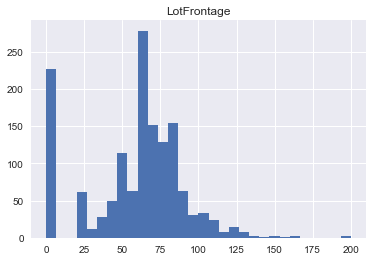

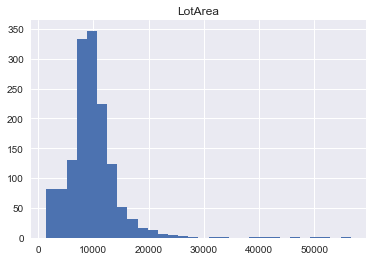

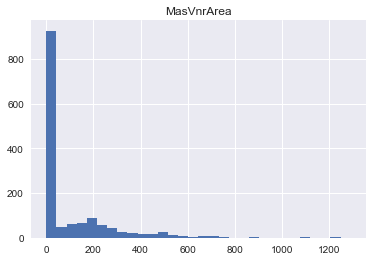

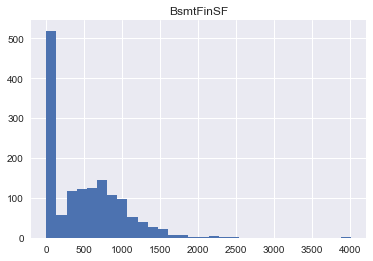

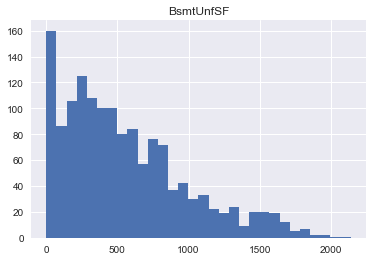

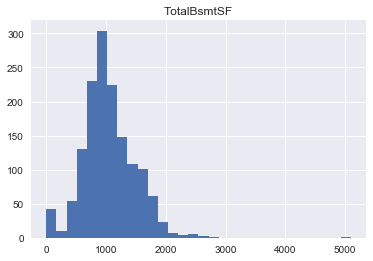

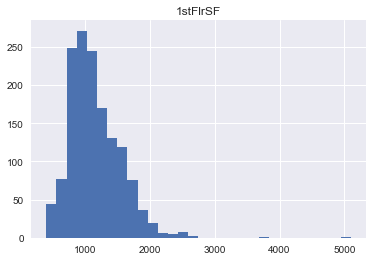

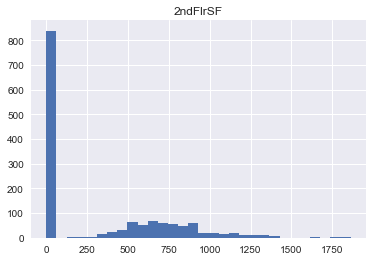

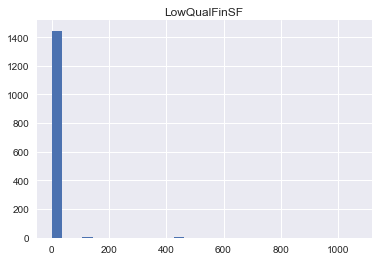

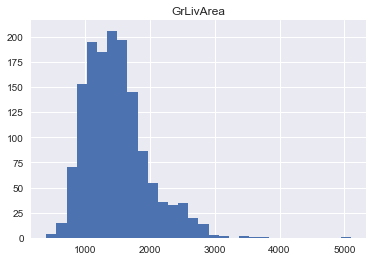

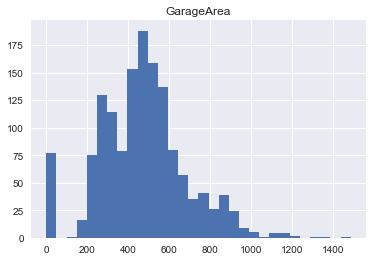

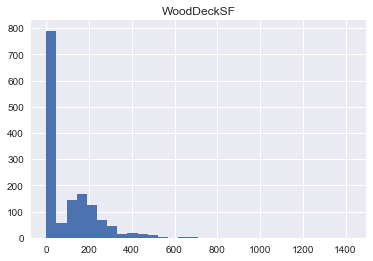

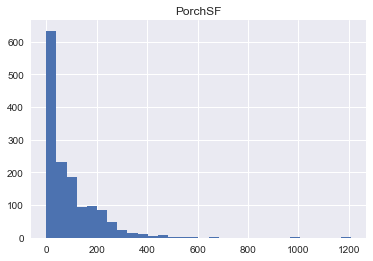

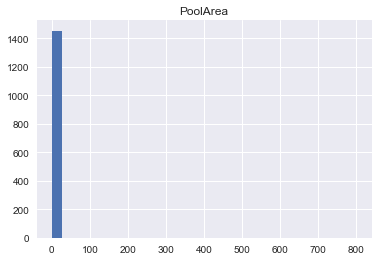

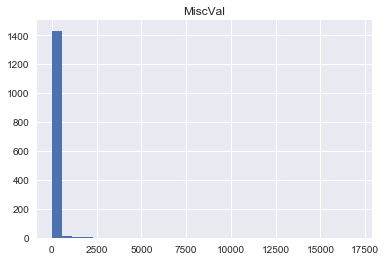

In [57]:
# Printing plots for int 64 and float64
# #quantvar = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
#             'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd',
#             'Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea'
#            ,'MiscVal','SalePrice']
quantvar = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
            'LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','PorchSF','PoolArea'
           ,'MiscVal']
cont_plot=housetest[quantvar]
for i in range(len(cont_plot.columns)):
        plt.hist(cont_plot.iloc[:,i].dropna(),bins=30)
        plt.title('%s' % cont_plot.columns[i])
        plt.show()

Examining the charts we can note several points of interest. We have several variables that skewed to the right. There do not appear to be any left skewed. This is more than likely caused by the presence of smaller outliers that were missed by our earlier scatter plot. 

For dealing with skew, the following transformations perform well:

* The log transformation (sometimes computed log(x+A) where A is some constant. This is done to deal with negative or 0 values.
* The Square Root function
* Converting to a Fraction, i.e. 1/x
* The Powers transformation

We can also use some combination thereof. For our base model, it was decided to keep things simple initially, and as we try to improve our models, try alternate methods.

For right skewed data, the log transformation works well, and this was the selected transformation for our model for the severly right skewed data listed above. It is suspected that if the outliers were dealt with, the data would become more normally distributed. This was the decided approach with a view of returning to this as we seek to improve the model.

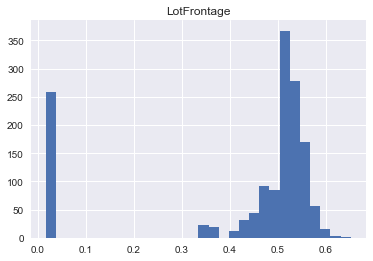

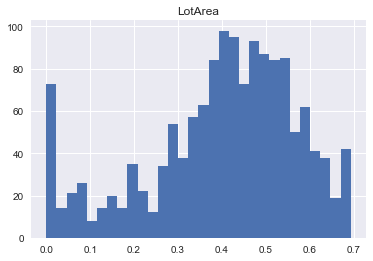

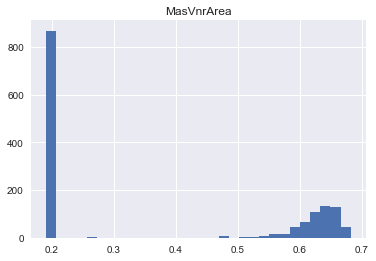

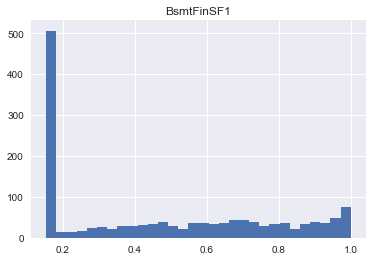

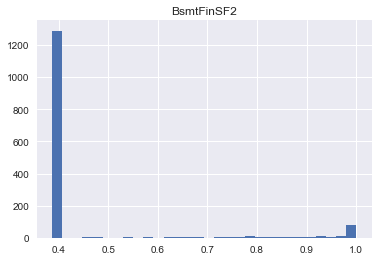

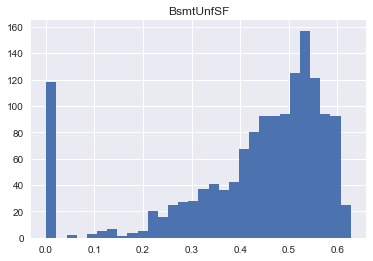

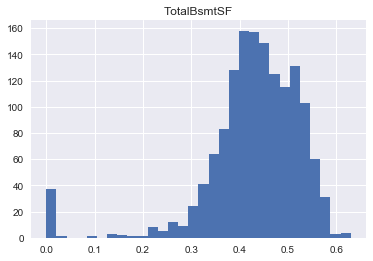

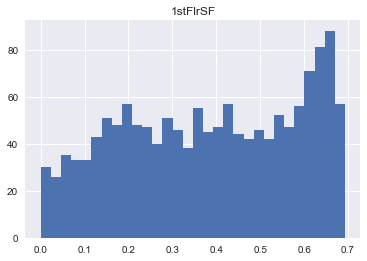

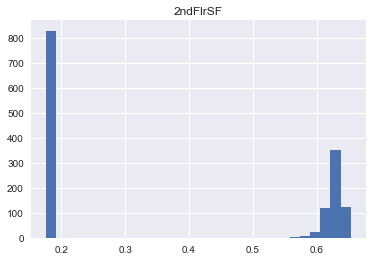

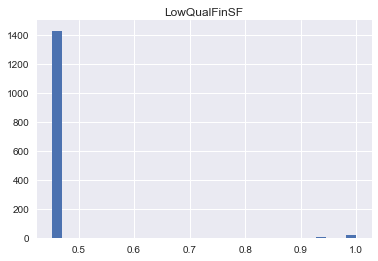

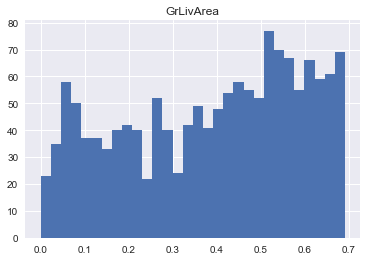

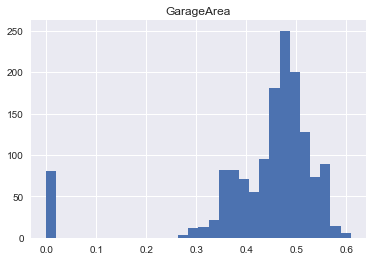

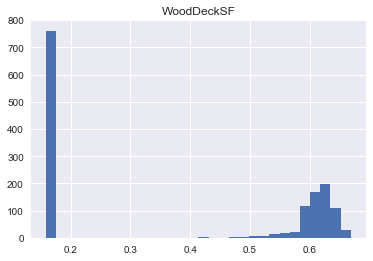

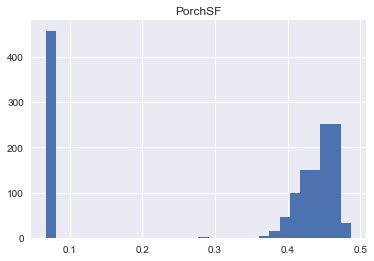

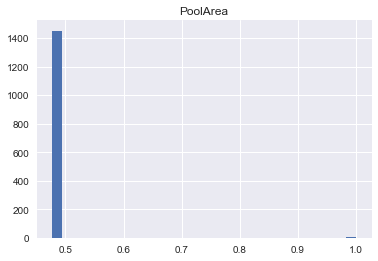

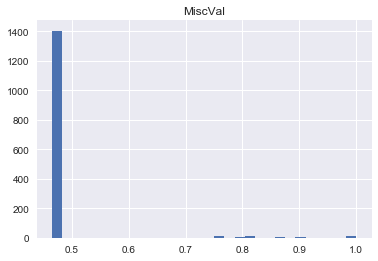

In [58]:
def log_transform(feature):
    housetrain[feature] = np.log1p(housetrain[feature].values) # does a log transform on x+1

#log transforming variables
log_transform('GrLivArea')
log_transform('PorchSF')
log_transform('1stFlrSF')
log_transform('2ndFlrSF')
log_transform('BsmtUnfSF')
log_transform('BsmtFinSF')
log_transform('TotalBsmtSF')
log_transform('LotArea')
log_transform('LotFrontage')
log_transform('KitchenAbvGr')
log_transform('GarageArea')
log_transform('MasVnrArea')
log_transform('WoodDeckSF')
log_transform('PorchSF')

quantvar = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
            'LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','PorchSF','PoolArea'
           ,'MiscVal']
cont_plot=housetrain[quantvar]
for i in range(len(cont_plot.columns)):
        plt.hist(cont_plot.iloc[:,i].dropna(),bins=30)
        plt.title('%s' % cont_plot.columns[i])
        plt.show()
# f = pd.melt(housetrain, value_vars=quantitative)
# g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
# g = g.map(sns.distplot, "value")

As we can see, using a log transformation we have normalised our data (excluding the zero values representing missing) and have tidied up the outliers.

# Standardising

In [59]:
import scipy.stats as st
def standard(data,method):
    """Standarising data using various methods.
    
    Method 1 is MinMax scaling 
    Method 2 is decimal
    Method 3 is Z score
    Version Control:
    Initial coding
    ------------------------------------------
    Date 4-Feb-18, Author: Conor Feeney, Desc: Initial Coding
    """
    if method == 1:
        X_std = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))
        data = X_std * (1 - 0) + 0
        return data
    elif method==2:
        data = (data)/(10**len(str(int(max(data)))))
        return data
    elif method ==3:
        data = (data - data.mean(axis=0))/data.std(axis=0)
        data=st.norm.cdf(data)
        return data
    elif method==4:
        return data
    
for i in range(len(housetrain.columns)):     
    if housetrain.iloc[:,i].dtype !=object:   
        housetrain.iloc[:,i]=standard(housetrain.iloc[:,i],3)
housetrain.describe()

C:\Users\conor\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\conor\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\conor\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1735: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


,Id,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SalePrice,BsmtFinSF,PorchSF,hasPool
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1.456000e+03,1456.000000,1456.000000,1456.000000,1456.000000,1375.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,0.499997,0.555258,0.522160,0.526844,0.567605,0.562175,0.476306,0.448835,0.508419,0.515940,0.479496,0.474569,0.445851,0.504710,0.516299,0.459542,0.490241,0.488827,0.465988,0.434552,0.540972,0.527719,0.534284,0.564738,0.505114,0.486075,0.456398,0.511678,0.482537,0.437294,0.508490,0.474719,0.507783,4.417628e-01,0.495007,0.492489,0.565287,0.499332,0.508981,0.516528,0.545612,0.559079,0.561296,0.564092,0.494435,0.469073,0.434874,0.457830,0.433659,0.478400,0.441207,0.446462,0.494369,0.498944,0.495182,0.530465,0.534925,0.478400
std,0.320021,0.262622,0.285358,0.328427,0.189798,0.133793,0.328900,0.269776,0.316066,0.323803,0.332572,0.328471,0.193897,0.334767,0.160655,0.304206,0.324334,0.318433,0.152024,0.192661,0.264705,0.248985,0.318978,0.149235,0.312028,0.337794,0.073324,0.310174,0.335766,0.136618,0.338175,0.329812,0.293565,1.231271e-01,0.338880,0.307862,0.153531,0.332419,0.320159,0.301109,0.222765,0.180975,0.173581,0.144829,0.339681,0.300607,0.220055,0.070213,0.166284,0.030629,0.261542,0.105657,0.306448,0.320381,0.308527,0.320602,0.316310,0.030629
min,0.070403,0.017984,0.010044,0.093519,0.001427,0.000013,0.067097,0.041288,0.041884,0.066224,0.207256,0.070493,0.008420,0.035717,0.000485,0.254531,0.070203,0.139490,0.000957,0.366114,0.004380,0.000013,0.036929,0.000077,0.026781,0.192496,0.446514,0.026439,0.201174,0.404147,0.060189,0.220477,0.032010,2.699736e-07,0.062176,0.042445,0.000079,0.152033,0.042334,0.036233,0.000179,0.000765,0.000477,0.000049,0.170855,0.194780,0.345779,0.448744,0.384755,0.476603,0.313650,0.426210,0.052710,0.092908,0.039283,0.077709,0.071245,0.476603
25%,0.161997,0.557775,0.299917,0.093519,0.631186,0.593995,0.227269,0.320761,0.217753,0.148093,0.207256,0.226581,0.391442,0.182690,0.525475,0.254531,0.170973,0.139490,0.444375,0.366114,0.365161,0.346853,0.083160,0.604152,0.195976,0.192496,0.446514,0.189497,0.201174,0.404147,0.138352,0.220477,0.093816,4.151346e-01,0.183654,0.134091,0.606966,0.152033,0.176677,0.099879,0.397954,0.609786,0.609853,0.601254,0.170855,0.194780,0.345779,0.448744,0.384755,0.476603,0.313650,0.426210,0.265931,0.231860,0.207738,0.077709,0.071245,0.476603
50%,0.500698,0.669287,0.569251,0.775596,0.631186,0.593995,0.227269,0.320761,0.490266,0.674291,0.207256,0.226581,0.391442,0.834776,0.525475,0.254531,0.631358,0.459766,0.444375,0.366114,0.620818,0.539735,0.757135,0.604152,0.516778,0.192496,0.446514,0.567919,0.201174,0.404147,0.810701,0.220477,0.595584,4.151346e-01,0.183654,0.349371,0.606966,0.787494,0.508297,0.655920,0.608168,0.609786,0.609853,0.601254,0.170855,0.358974,0.345779,0.448744,0.384755,0.476603,0.313650,0.426210,0.444457,0.573360,0.477379,0.737235,0.720668,0.476603
75%,0.837586,0.720383,0.762423,0.7

# Using the Training model on the Test set
Now that we have applied all recoding and transformations on the training, we now apply that training model on the test set. Below we make the last edits to the data before we use the lasso model seen earlier to predict sale prices on the houses.

In [60]:
Testset=pd.DataFrame.copy(housetest)

# dropping unneeded variables
Testset=Testset.drop('Utilities',axis=1)
Testset=Testset.drop('PoolQC',axis=1)
Testset=Testset.drop('PoolArea',axis=1)

# creating dummy variables for categorical variables
group = Testset.columns.to_series().groupby(Testset.dtypes).groups # grouping columns by type
groups={k.name: v for k, v in group.items()} #  creating as dictionary

ID=pd.DataFrame.copy(Testset['Id'])
# creating dummy variables for categorical variables
dummies = pd.get_dummies(Testset[groups['object'].values])

Testset = Testset.join(dummies)
Testset=Testset.drop(Testset[groups['object'].values],axis=1)

# Dropping variables due to recoding
Testset=Testset.drop('GarageYrBlt',axis=1)
Testset=Testset.drop('OpenPorchSF',axis=1)
Testset=Testset.drop('EnclosedPorch',axis=1)
Testset=Testset.drop('3SsnPorch',axis=1)
Testset=Testset.drop('ScreenPorch',axis=1)
Testset=Testset.drop('BsmtFinSF1',axis=1)
Testset=Testset.drop('BsmtFinSF2',axis=1)

#dropping variables due to no presence in training set / Id variable.
Testset=Testset.drop('Id',axis=1)
Testset=Testset.drop('MSSubClass_150',axis=1)

Testset.shape



(1459, 198)

In [61]:
y_test_las = clf.predict(Testset)
print(y_test_las)



[ 2071.97984232  2574.58513943  2547.18438727 ...,  3148.95754758
  1966.94651608  2224.07096115]


In [62]:
y_test.describe()

count    437.000000
mean       0.499755
std        0.288230
min        0.000046
25%        0.257188
50%        0.478806
75%        0.741336
max        0.999584
Name: SalePrice, dtype: float64